<h1 style = "color : #00008B">Lending Club Case study</h1>

<h2 style = "color : Brown">Data Sourcing</h2>

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
print('pd: {}'.format(pd.__version__))
print('seaborn: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))


matplotlib: 3.8.0
pd: 2.1.4
seaborn: 2.1.4
numpy: 1.26.4


In [3]:
#import data
input=pd.read_csv('loan.csv')

In [4]:
# Summary of the data frame
input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


We have 39717 rows and 111 columns

<h2 style = "color : #8B0000">Data Cleaning</h2>

<h3 style = "color : #006400">Fixing columns  </h3>

<h4 style = "color : #4169E1"> Clear all columns with high count of null values</h4>
- While looking into the data visually, we could see that there are quite some columns that have only null values. First motive is to drop them first
- Plotting the percentage of nullness, we could also locate few other variables with high null values.
- Dropping the columns that has more than 35% null values

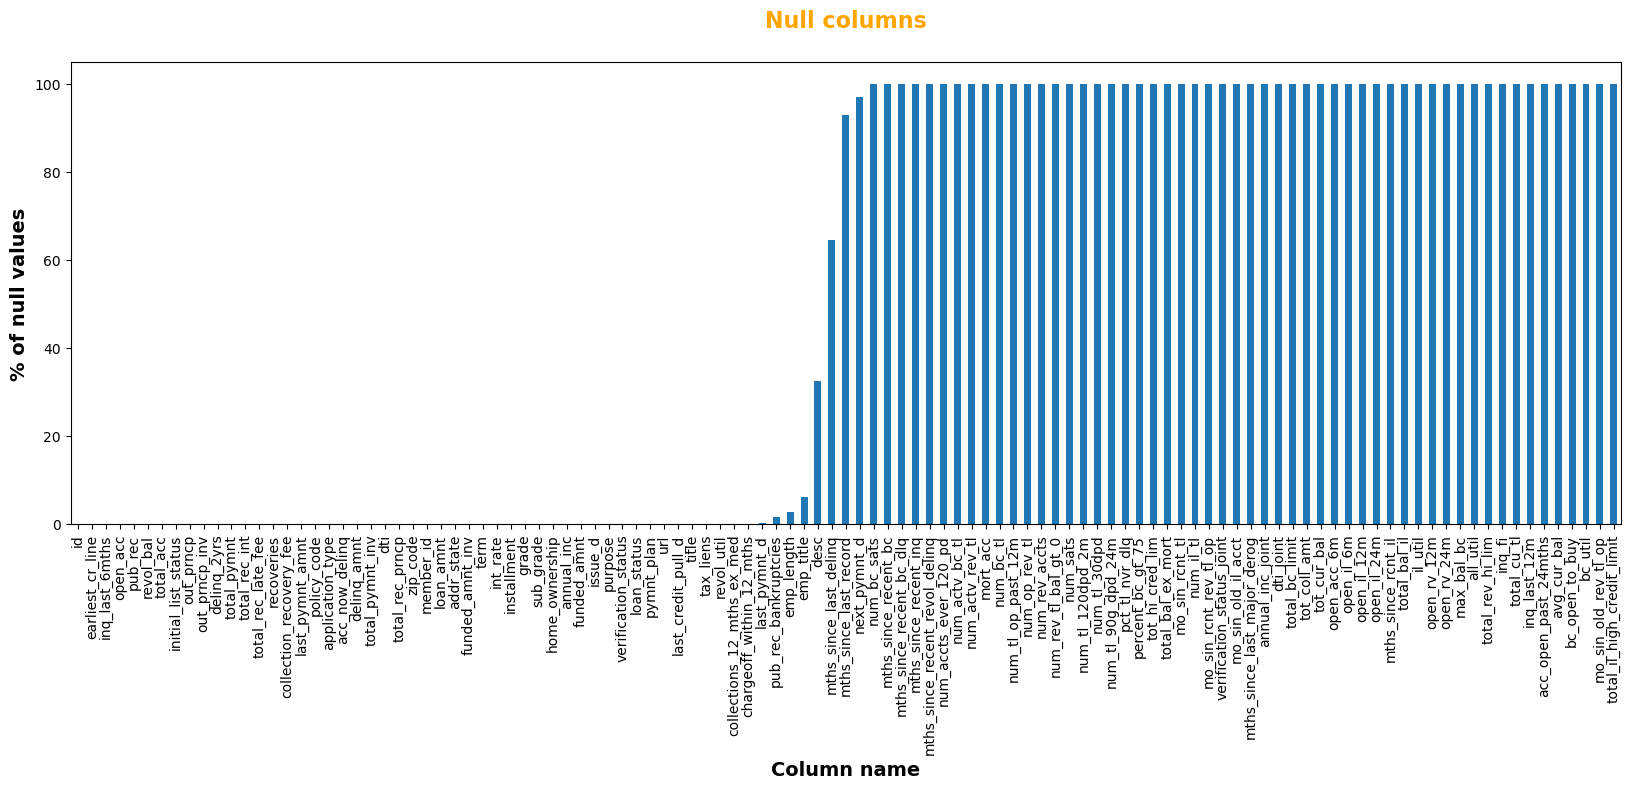

In [5]:
#Plot to show the percentage of null values in each column.
(100 * input.isna().sum() / input.shape[0]).sort_values().plot.bar(figsize=(20,6))
plt.xlabel('Column name', fontsize=14, fontweight='bold')
plt.ylabel('% of null values', fontsize=14, fontweight='bold')
plt.title('Null columns\n',fontsize=16, fontweight='bold',color ='Orange')
plt.show()

In [6]:
# Identify the number of columns where the percentage of missing values is greater than 30%

null_percent = 100 * input.isna().sum() / input.shape[0]
null_columns = null_percent[null_percent > 30].index
len(null_columns)

58

In [7]:
# Drop these 58 columns
df=input.drop(columns=null_columns)

In [8]:
df.shape

(39717, 53)

*- With these columns dropped Number of columns reduced from 111 to 53*    



    

<h4 style = "color : #4169E1"> Checking the target variable(loan_status) to see if it has any null/incorrect values</h4>


In [9]:
#Check the values in Target variable - loan_status
df.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

*- No null/incorrect values found*

<h4 style = "color : #4169E1">Removing columns that has only one unique value across all records. </h4>
- This wont help in distinguishing anything. It would be same for all records.

In [10]:
# Identify columns that has only single value 
single_value_columns = [col for col in df.columns if df[col].nunique() == 1]
single_value_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [11]:
# Drop columns that has only single value 
df=df.drop(single_value_columns, axis=1)

In [12]:
df.shape

(39717, 44)

*- With these columns dropped Number of columns reduced from 53 to 44*    

<h4 style = "color : #4169E1">Removing Columns with categorical variables and unique values for all records </h4>
- For example, member_id, id are unique for each loan record and there is no duplicates for these. There are also not influencing target variable

In [13]:
# Listing the unique values in each column
df.nunique()

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
url                        39717
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util                  1089
total_acc 

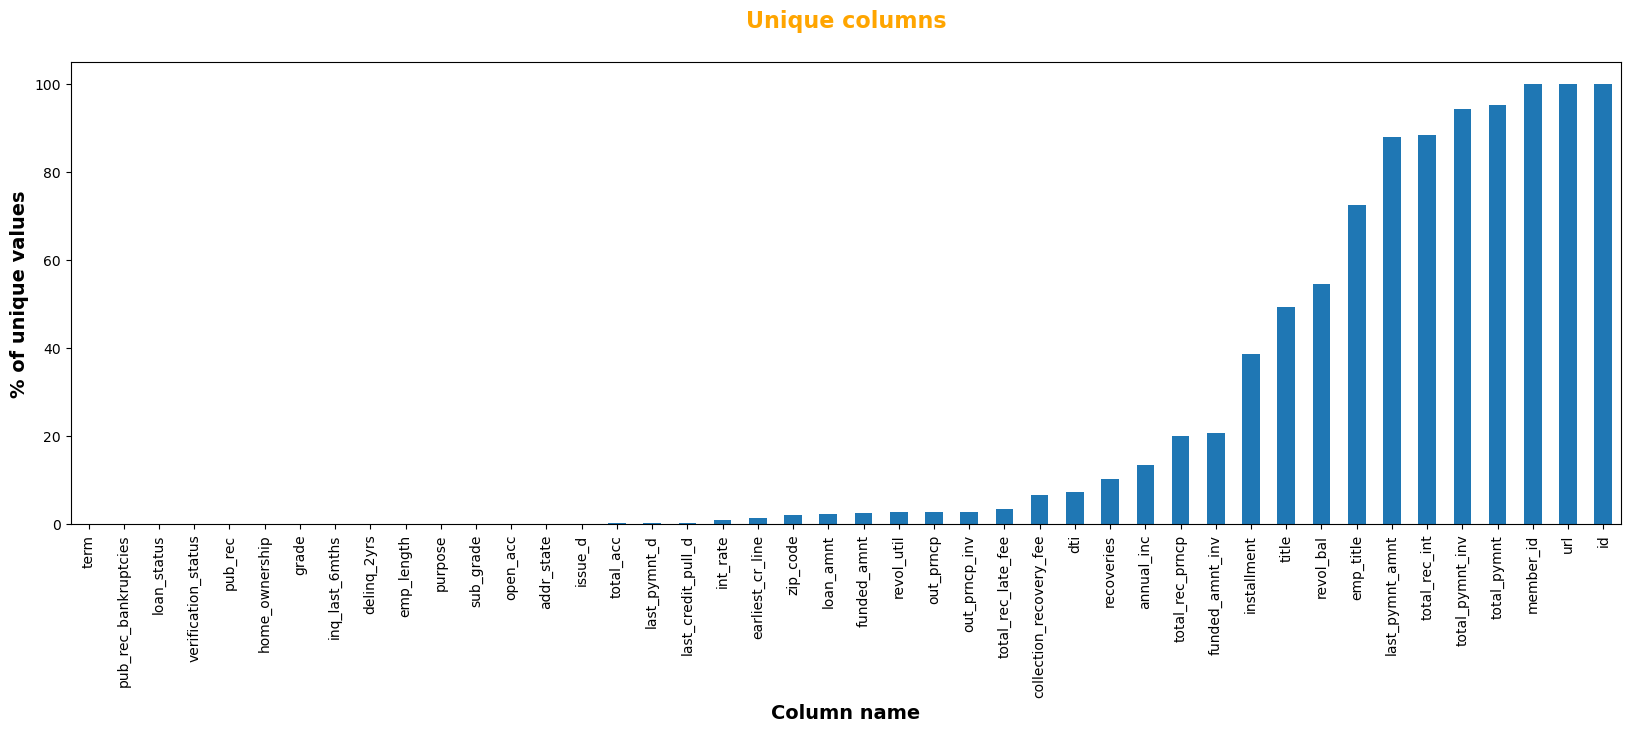

In [14]:
# Plotting it in graph to see the uniquness percentage in each column.
(100 * df.nunique() / df.shape[0]).sort_values().plot.bar(figsize=(20,6))
plt.xlabel('Column name', fontsize=14, fontweight='bold')
plt.ylabel('% of unique values', fontsize=14, fontweight='bold')
plt.title('Unique columns\n',fontsize=16, fontweight='bold', color ='Orange')
plt.show()

In [15]:
# Removing categorical variables that have high unique values
df=df.drop(['id','member_id','url', 'emp_title','title'], axis=1)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

<h4 style = "color : #4169E1">Unrelated columns - variables that are related to post loan recovery process. </h4>

For example, total_rec_late_fee, recoveries are something that are comes into picture after the loan is approved. They dont play a role in loan approval unless same user has multiple loans with the Lending company. Looking ito the member ID, there is no duplicate, so there is no user who has multiple loans with this company.

In [17]:
# Unrelated columns - these variables are related to post loan recovery process and are not influcing the loan approval
columns_after_fund=['out_prncp','out_prncp_inv','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries','collection_recovery_fee', 'last_pymnt_amnt', 'last_pymnt_d','last_credit_pull_d' ]
df=df.drop(columns_after_fund, axis=1)

In [18]:
df.shape

(39717, 27)

<h3 style = "color : #006400">Datatype Manipulation  </h3>

In [19]:
# Checking all the data types to see if any column needs conversion or standardization
df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

<h4 style = "color : #4169E1">Strings to float </h4>  
Percentage values(revol_util, int_rate) stored as strings. Converting them to float since these are numeric variables

In [20]:
df.revol_util=df.revol_util.str.replace('%','').astype(float)

In [21]:
df.int_rate=df.int_rate.str.replace('%','').astype(float)

In [22]:
df.revol_util.dtype

dtype('float64')

<h4 style = "color : #4169E1"> Strings to Datetime </h4>h4
- Date values(issue_d, earliest_cr_line) stored as strings. Converting them to datetime dtype

In [23]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')

In [24]:
df['issue_d'].dtype

dtype('<M8[ns]')

<h3 style = "color : #006400">Sanity Checks - Fixing rows </h3>

<h4 style = "color : #4169E1">Check for Outliers from summary </h4>

In [25]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717,39717.000000,39717.000000,39717,39717.000000,39717.000000,39717.000000,39717.000000,39667.000000,39717.000000,39020.000000
mean,11219.443815,10947.713196,10397.448868,12.021177,324.561922,6.896893e+04,2010-11-03 23:26:45.166553344,13.315130,0.146512,1997-04-11 16:09:21.250849664,0.869200,9.294408,0.055065,13382.528086,48.832152,22.088828,0.043260
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,2007-06-01 00:00:00,0.000000,0.000000,1969-02-01 00:00:00,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,9.250000,167.020000,4.040400e+04,2010-05-01 00:00:00,8.170000,0.000000,1993-12-01 00:00:00,0.000000,6.000000,0.000000,3703.000000,25.400000,13.000000,0.000000
50%,10000.000000,9600.000000,8975.000000,11.860000,280.220000,5.900000e+04,2011-02-01 00:00:00,13.400000,0.000000,1998-05-01 00:00:00,1.000000,9.000000,0.000000,8850.000000,49.300000,20.000000,0.000000
75%,15000.000000,15000.000000,14400.000000,14.590000,430.780000,8.230000e+04,2011-08-01 00:00:00,18.600000,0.000000,2001-09-01 00:00:00,1.000000,12.000000,0.000000,17058.000000,72.400000,29.000000,0.000000
max,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,2011-12-01 00:00:00,29.990000,11.000000,2068-12-01 00:00:00,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,2.000000
std,7456.670694,7187.238670,7128.450439,3.724825,208.874874,6.379377e+04,NaN,6.678594,0.491812,NaN,1.070219,4.400282,0.237200,15885.016641,28.332634,11.401709,0.204324


**Annual income** value has quite some outliers - but we are unable to confirm if the high incomes are actual outliers. People with high income can also avail loans- We will analyze if it is a driver variable, if it is hen we shall remove these outliers; 

We could see that **earliest_cr_line** has so many outliers and checking the max value, it is year 2068 which is clearly incorrect value. Checking with the previous string values of earliest_cr_line, we could see it is something with datetime conversion probelm with 2 digit year values. Ref: https://docs.python.org/3/library/time.html

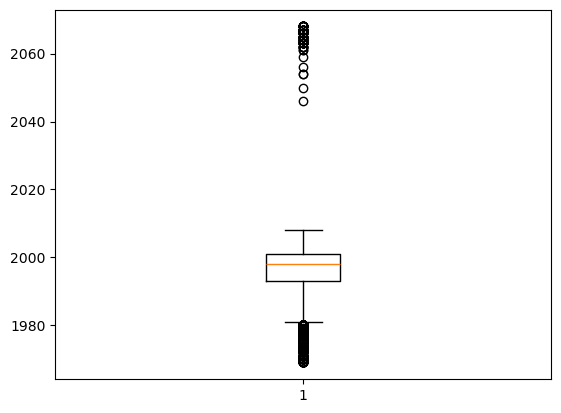

In [26]:
plt.boxplot([df.earliest_cr_line.dt.year])
plt.show()

In [27]:
sorted(df.earliest_cr_line.dt.year.unique())

[1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2046,
 2050,
 2054,
 2056,
 2059,
 2061,
 2062,
 2063,
 2064,
 2065,
 2066,
 2067,
 2068]

In [28]:
# Handling thee datetime conversion problem using custom function
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: x.replace(year=x.year-100) if x.year>2025 else x)

In [29]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717,39717.000000,39717.000000,39717,39717.000000,39717.000000,39717.000000,39717.000000,39667.000000,39717.000000,39020.000000
mean,11219.443815,10947.713196,10397.448868,12.021177,324.561922,6.896893e+04,2010-11-03 23:26:45.166553344,13.315130,0.146512,1997-01-18 21:45:07.545887104,0.869200,9.294408,0.055065,13382.528086,48.832152,22.088828,0.043260
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,2007-06-01 00:00:00,0.000000,0.000000,1946-01-01 00:00:00,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,9.250000,167.020000,4.040400e+04,2010-05-01 00:00:00,8.170000,0.000000,1993-11-01 00:00:00,0.000000,6.000000,0.000000,3703.000000,25.400000,13.000000,0.000000
50%,10000.000000,9600.000000,8975.000000,11.860000,280.220000,5.900000e+04,2011-02-01 00:00:00,13.400000,0.000000,1998-05-01 00:00:00,1.000000,9.000000,0.000000,8850.000000,49.300000,20.000000,0.000000
75%,15000.000000,15000.000000,14400.000000,14.590000,430.780000,8.230000e+04,2011-08-01 00:00:00,18.600000,0.000000,2001-09-01 00:00:00,1.000000,12.000000,0.000000,17058.000000,72.400000,29.000000,0.000000
max,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,2011-12-01 00:00:00,29.990000,11.000000,2008-11-01 00:00:00,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,2.000000
std,7456.670694,7187.238670,7128.450439,3.724825,208.874874,6.379377e+04,NaN,6.678594,0.491812,NaN,1.070219,4.400282,0.237200,15885.016641,28.332634,11.401709,0.204324


###Sanity Checks<h3>

<h4 style = "color : #4169E1">Removing Rows (all loan_status='current') </h4>
- Becuase we dont know the result of these loans whether they are really fully paid or defaulted, therefore it would not help studing their patterns or behaviors

In [30]:
df=df[~(df.loan_status=="Current")] # Removing rows with loan_status = current, because these loans are still ongoing, and we dont have a result to rely on this data.

In [31]:
df.term.value_counts()

term
 36 months    29096
 60 months     9481
Name: count, dtype: int64

In [32]:
df.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

<h4 style = "color : #4169E1">3 columns still with considerable amount of missing values </h4>

In [33]:
df.isnull().sum() # 3 columns still with considerable amount of missing values - emp_length, revol_util, pub_rec_bankruptcies. Will fix one by one

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

In [34]:
df.emp_length.value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [35]:
#Filling null/missing values in emp_length with mode value(10+ years)

df.emp_length= df.emp_length.fillna('10+ years')

In [36]:
df.emp_length.value_counts()

emp_length
10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [37]:
df.pub_rec_bankruptcies.describe()

count    37880.000000
mean         0.043479
std          0.204583
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [38]:
df.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    36238
1.0     1637
2.0        5
Name: count, dtype: int64

In [39]:
#Filling null/missing values in pub_rec_bankruptcies with mode value(0)
df.pub_rec_bankruptcies=df.pub_rec_bankruptcies.fillna(0)

In [40]:
df.revol_util.value_counts()

revol_util
0.00     954
0.20      62
63.00     62
40.70     57
31.20     57
        ... 
77.63      1
25.74      1
0.83       1
47.36      1
7.28       1
Name: count, Length: 1088, dtype: int64

In [41]:
df.revol_util.dtype

dtype('float64')

In [42]:
df.revol_util.describe()

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

In [43]:
#Filling null/missing values in pub_rec_bankruptcies with median value
df.revol_util=df.revol_util.fillna(df.revol_util.median())

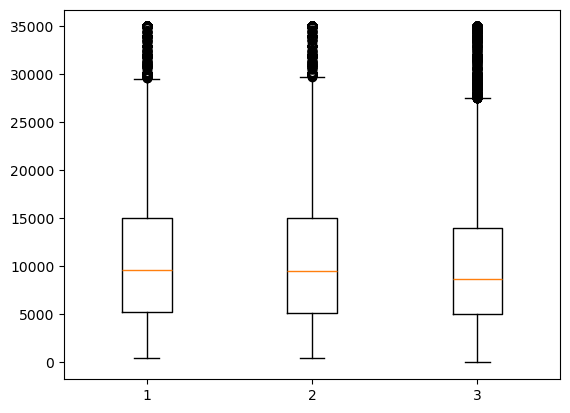

In [44]:
plt.boxplot([df.loan_amnt, df.funded_amnt, df.funded_amnt_inv])
plt.show()

In [45]:
df.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [46]:
df.shape

(38577, 27)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  object        
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  object        
 7   sub_grade             38577 non-null  object        
 8   emp_length            38577 non-null  object        
 9   home_ownership        38577 non-null  object        
 10  annual_inc            38577 non-null  float64       
 11  verification_status   38577 non-null  object        
 12  issue_d               38577 non-null  datetime64[ns]
 13  loan_status          

In [48]:
# Taking a copy of df, as a backup object

df2=df.copy

<h4 style = "color : #4169E1">Split the data into 2 parts </h4>
- Defaulters(charged off) and fully paid, with these 2 dataframes we will do plotting and do side-side comparison for better results

In [49]:
df_default=df[df.loan_status=='Charged Off']
df_paid=df[df.loan_status=='Fully Paid']

In [50]:
df_default.shape

(5627, 27)

In [51]:
df_paid.shape

(32950, 27)

<h2 style = "color : Brown">Data Analysis</h2>

<h3 style = "color : #006400">Resuable functions</h3>

In [52]:
# Sub plot to show side-by-side comparision for default loans and fully Paid loans. We will be using subplots throughout this univariate analysis, 
# therefore using it as a resuable function for better convinience and code sanity

def sub_plot(plot_kind, default_variable, paid_varriable, main_title,  x_label):
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
    fig.suptitle('\nVariable - ' + main_title, fontsize=16, fontweight='bold')

    
    default_color='skyblue'
    paid_color='salmon'


    #selecting the plot
    if plot_kind=='distribution_plot':
        sns.distplot(default_variable,  color=default_color, ax=axes[0])
        sns.distplot(paid_varriable, color=paid_color, ax=axes[1])
        y_label='Density'
    
    elif plot_kind=='bar_plot':
        default_variable.value_counts().plot.bar(ax=axes[0], color=default_color)
        paid_varriable.value_counts().plot.bar(ax=axes[1], color=paid_color)
        y_label='Count'

    elif plot_kind=='bar_plot_ordered':
        default_variable.plot.bar(ax=axes[0],  color=default_color)
        paid_varriable.plot.bar(ax=axes[1],  color=paid_color)
        y_label='Count'

    elif plot_kind=='pie_chart':
        default_variable.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'], ax=axes[0])
        paid_varriable.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'], ax=axes[1])
        x_label=''
        y_label=''
        
    axes[0].set_title('Defaulted Loans \n', fontsize=14, color='maroon')
    axes[0].set_xlabel('\n' + x_label, fontsize=12, fontweight='bold')
    axes[0].set_ylabel('\n' + y_label, fontsize=12, fontweight='bold')
  
    
    axes[1].set_title('Fully Paid Loans\n', fontsize=14, color ='darkgreen')
    axes[1].set_xlabel('\n' + x_label, fontsize=12, fontweight='bold')
    axes[1].set_ylabel('\n' + y_label, fontsize=12, fontweight='bold')
   

    
    plt.show()
  
  

In [53]:
def distribution_plot(default_variable, paid_varriable, main_title,  x_label):
    sub_plot('distribution_plot', default_variable, paid_varriable, main_title,  x_label)

In [54]:
def bar_plot(default_variable, paid_varriable, main_title,  x_label):
    sub_plot('bar_plot', default_variable, paid_varriable, main_title,  x_label)

In [55]:

def bar_plot_ordered(variable_order,default_variable, paid_varriable, main_title,x_label):
    
    def_variable_counts = default_variable.value_counts()
    paid_variable_counts = paid_varriable.value_counts()

    def_variable_counts = def_variable_counts.reindex(variable_order)
    paid_variable_counts = paid_variable_counts.reindex(variable_order)

    sub_plot('bar_plot_ordered', def_variable_counts, paid_variable_counts, main_title, x_label)



In [56]:
def pie_chart(default_variable, paid_varriable, main_title):

    sub_plot('pie_chart',default_variable, paid_varriable, main_title,'')


<h3 style = "color : #006400">Univariate analysis</h3>

<h4 style = "color : #4169E1">Numerical variables</h4>

##### loan_amt
Desc: The listed amount of the loan applied for by the borrower.
<br><br>

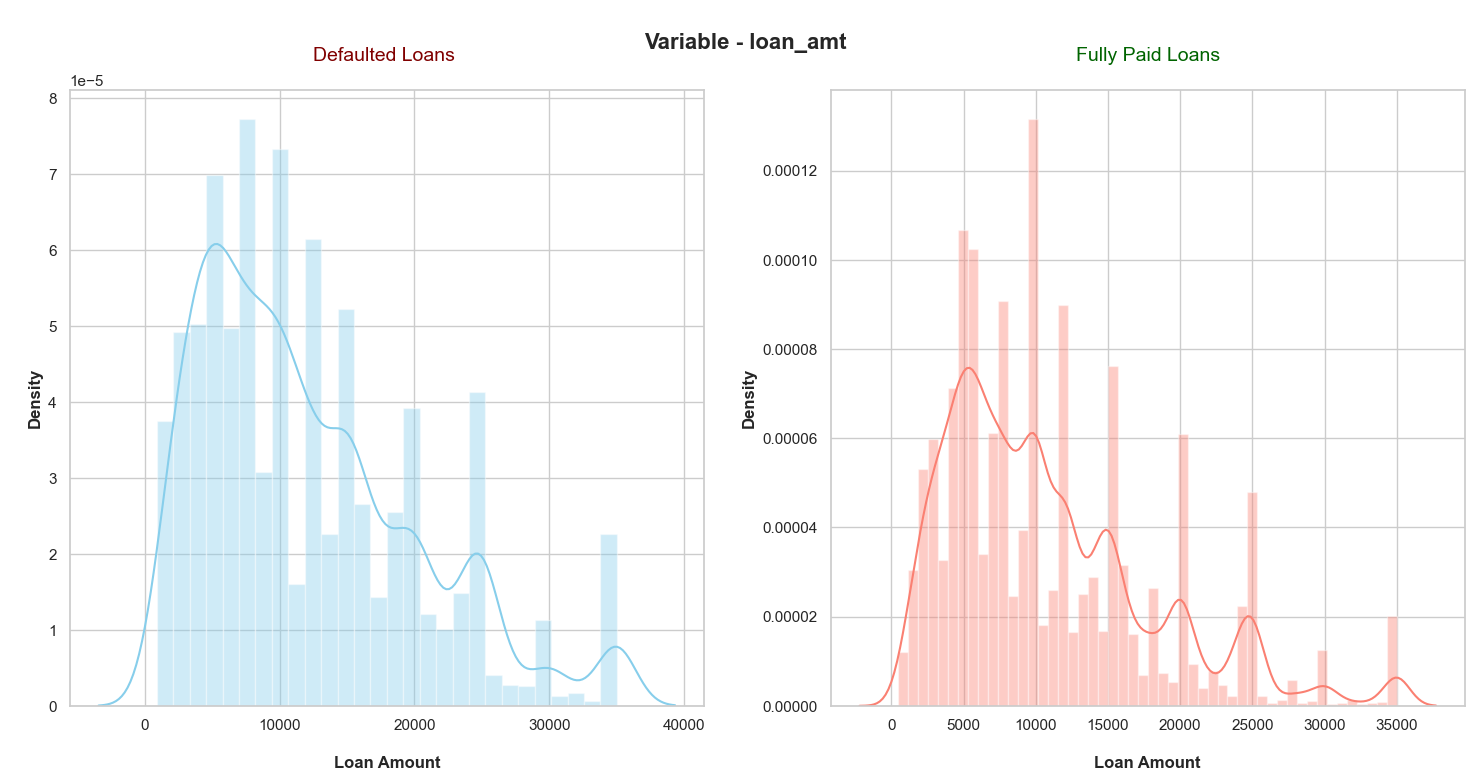

In [57]:
distribution_plot(df_default.loan_amnt, df_paid.loan_amnt, 'loan_amt', 'Loan Amount')

*Observation: We could see that PDC is similar for both Defaulted Loans and Fully paid loans. Therefore this column will be ignored*
<br>
<br>

---



##### funded_amnt
Desc: The total amount committed to that loan at that point in time. 
<br><br>


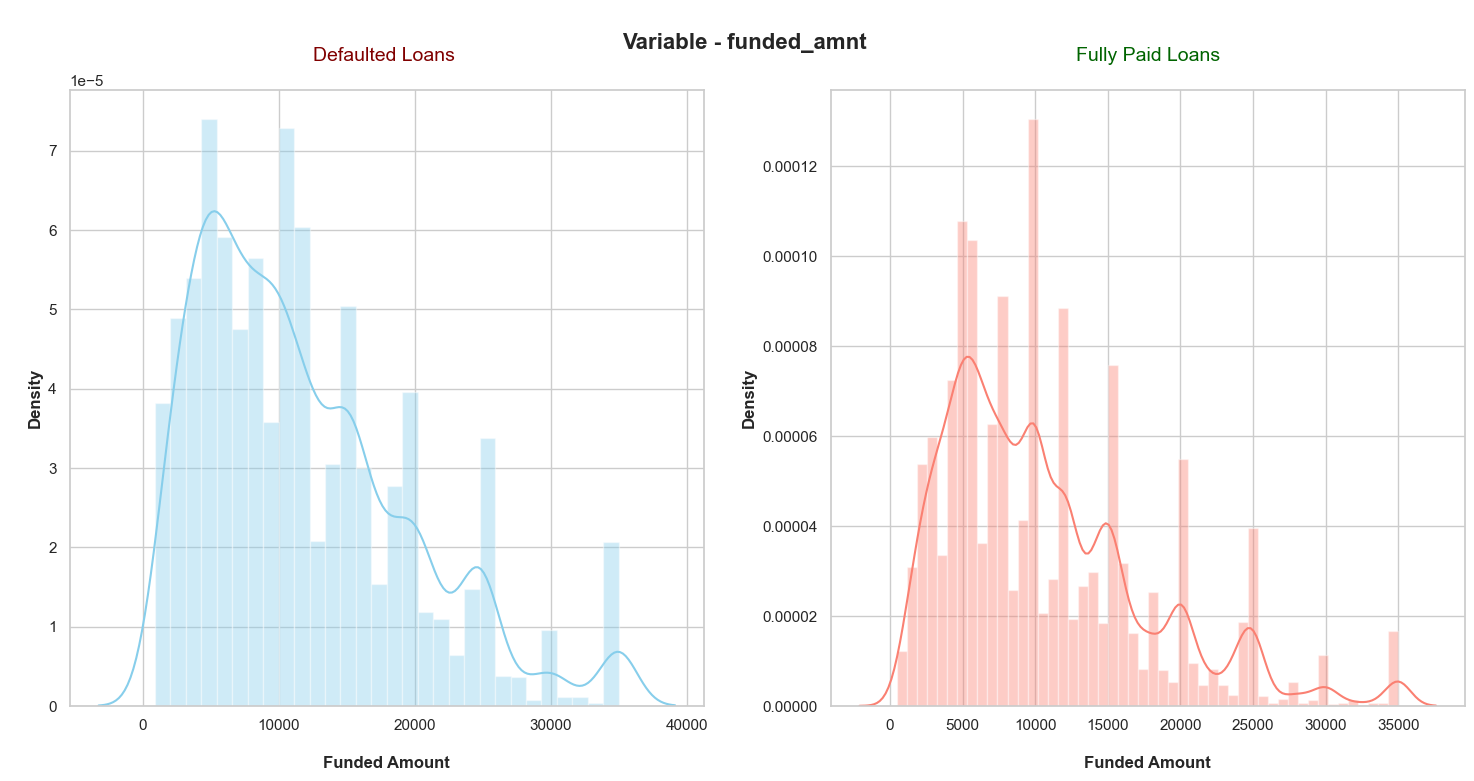

In [58]:
distribution_plot(df_default.funded_amnt, df_paid.funded_amnt, 'funded_amnt', 'Funded Amount')

*Observation: We could see that PDC is similar for both Defaulted Loans and Fully paid loans. Therefore this column will be ignored*
<br>
<br>

---



##### funded_amnt_inv
Desc: The total amount committed by investors for that loan at that point in time.
<br><br>


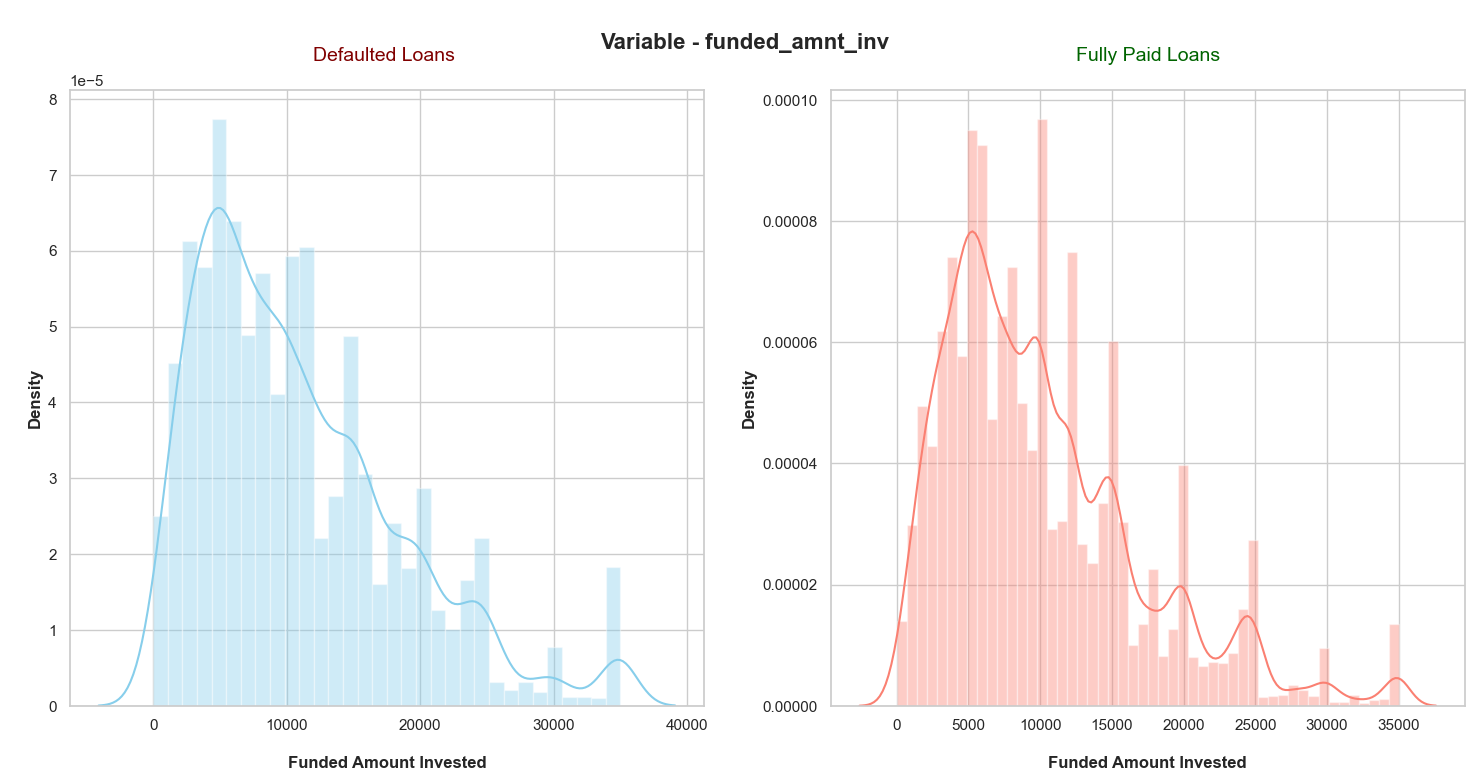

In [59]:
distribution_plot(df_default.funded_amnt_inv, df_paid.funded_amnt_inv, 'funded_amnt_inv', 'Funded Amount Invested')

*Observation: We could see that PDC is similar for both Defaulted Loans and Fully paid loans. Therefore this column will be ignored*
<br>
<br>

---



##### installment
Desc: The monthly payment owed by the borrower if the loan originates.
<br><br>


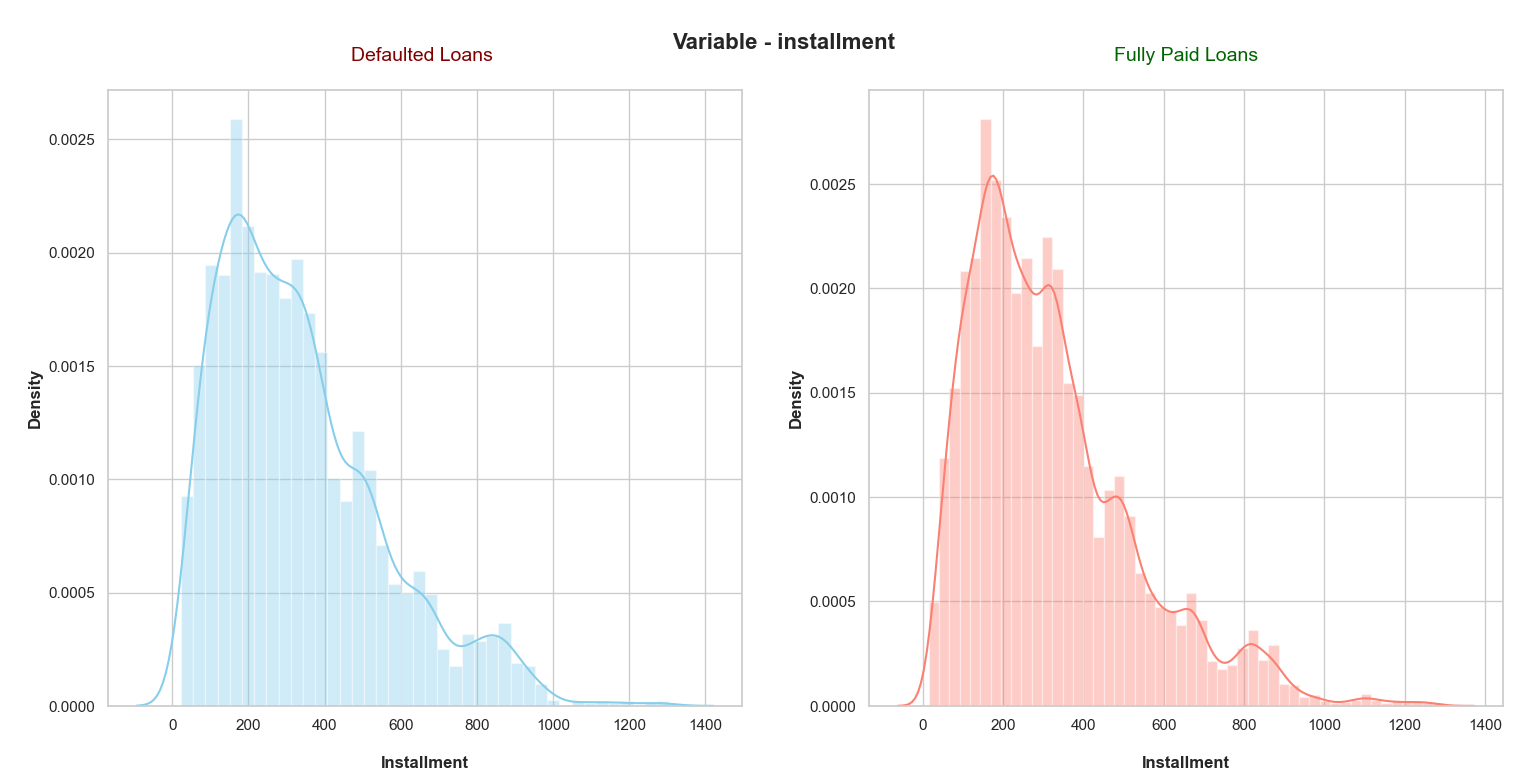

In [60]:
distribution_plot(df_default.installment, df_paid.installment, 'installment', 'Installment')

*Observation: We could see that PDC is similar for both Defaulted Loans and Fully paid loans. Therefore this column will be ignored*
<br>
<br>

---



##### annual_inc
Desc: The self-reported annual income provided by the borrower during registration.
<br><br>


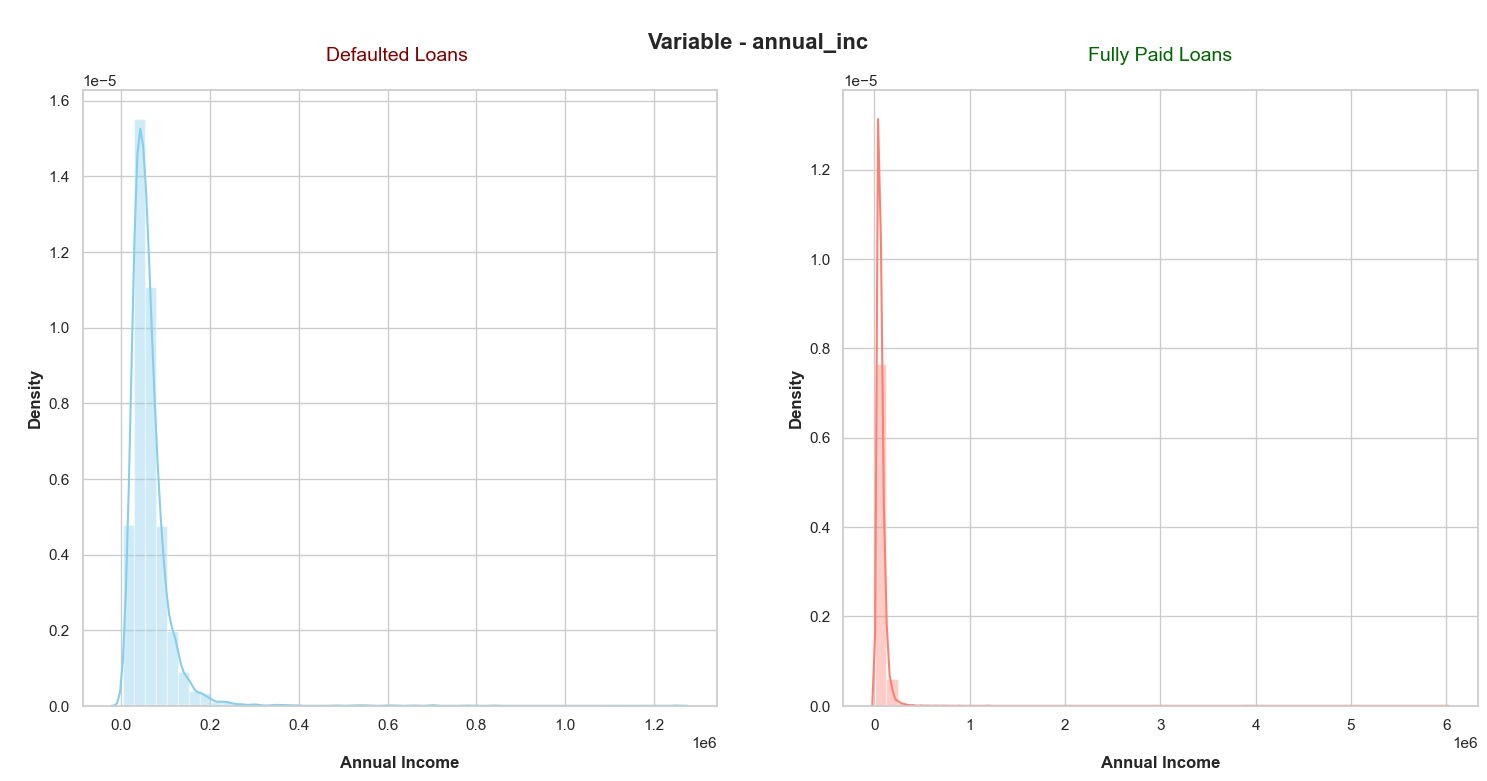

In [61]:
distribution_plot(df_default.annual_inc, df_paid.annual_inc, 'annual_inc', 'Annual Income')

*Observation: Unable to comment on annual_inc at this moment, the spike seems to be similar; but the range of annual_inc is different. Could be due to the outliers, we need to revisit to check the outliers. **We wil consider this column***
<br>
<br>

---



##### dti
Desc: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
<br><br>


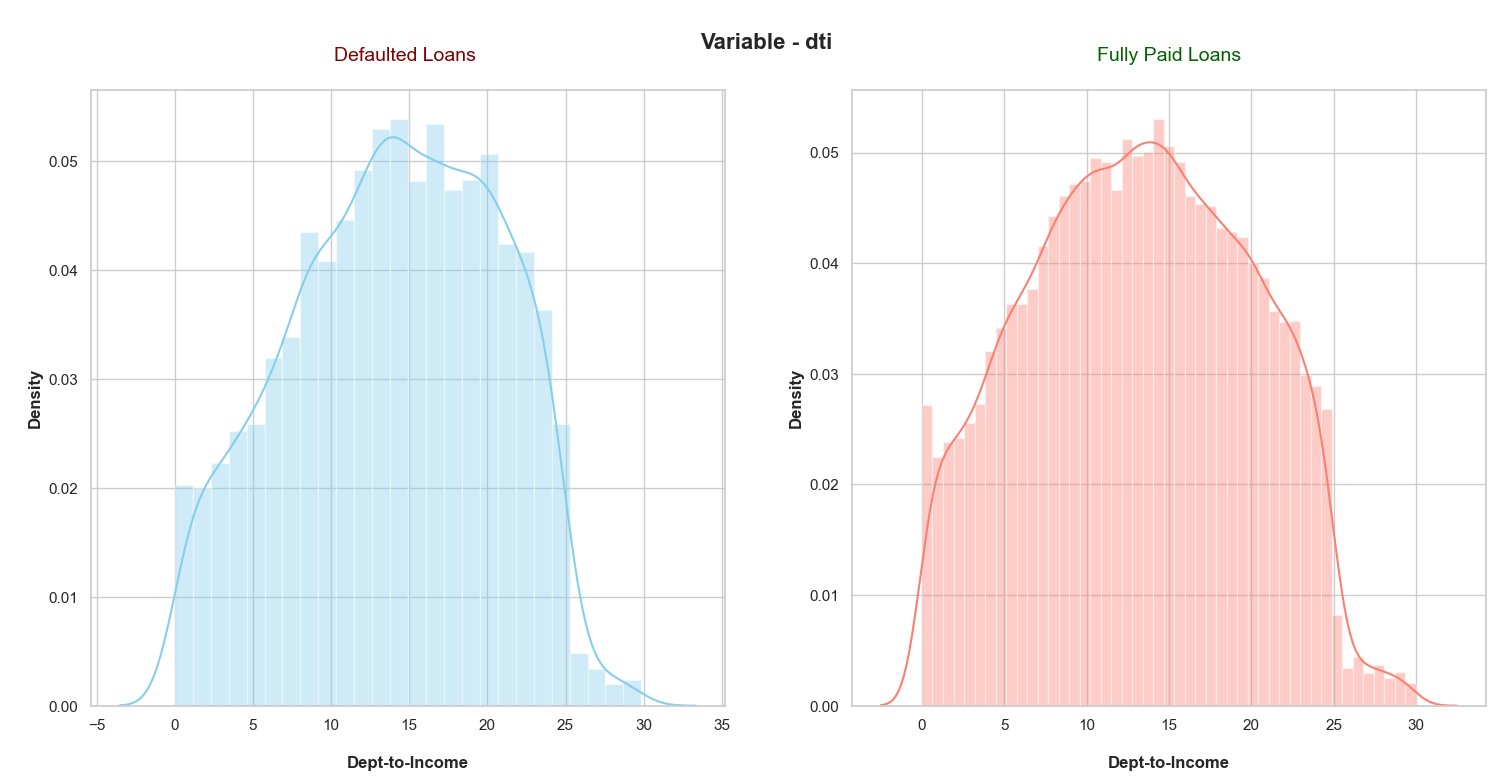

In [62]:
distribution_plot(df_default.dti, df_paid.dti, 'dti', 'Dept-to-Income')

*Observation: We could see that PDC is similar for both Defaulted Loans and Fully paid loans. Therefore this column will be ignored*
<br>
<br>

---



##### delinq_2yrs
Desc: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
<br><br>


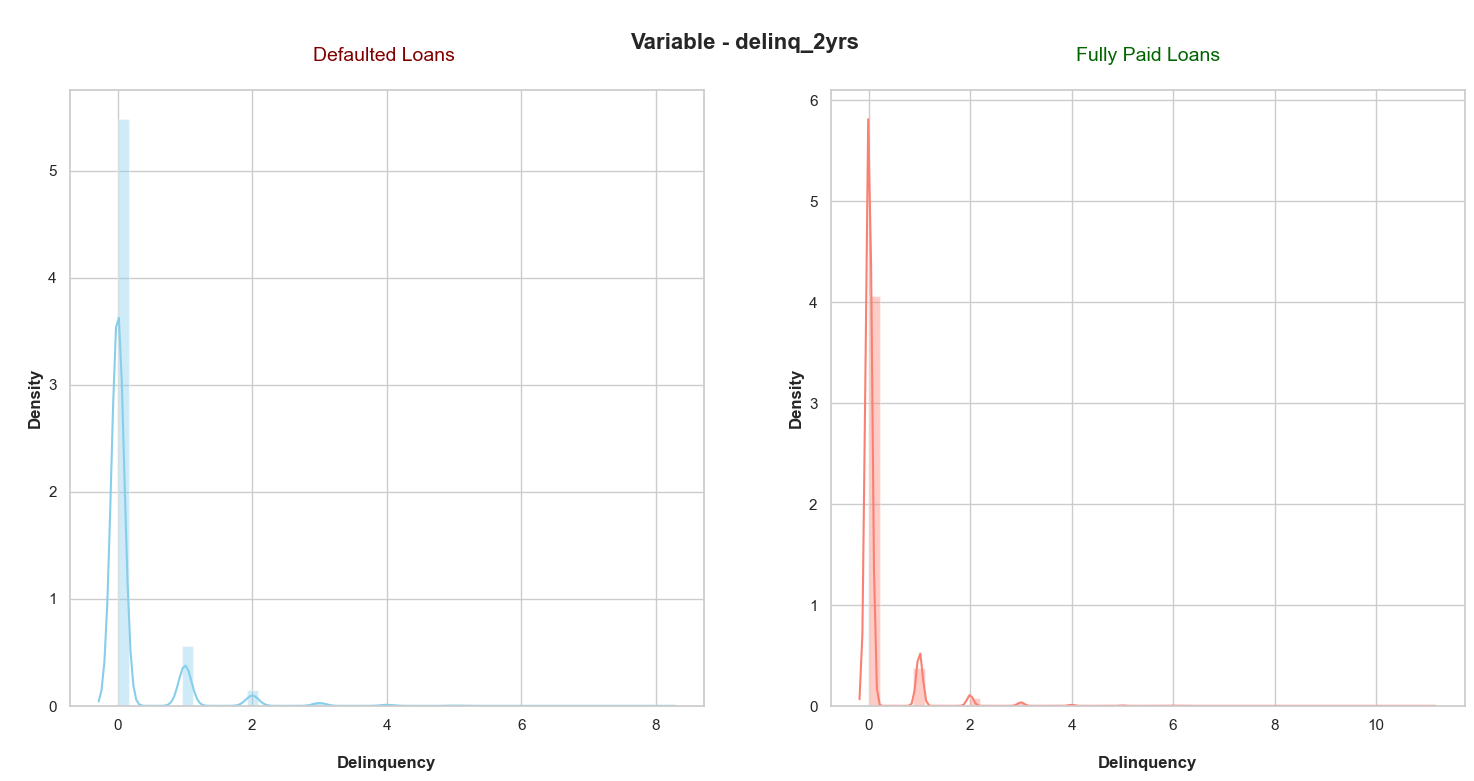

In [63]:
distribution_plot(df_default.delinq_2yrs, df_paid.delinq_2yrs, 'delinq_2yrs', 'Delinquency')

*Observation: We could see that PDC is similar for both Defaulted Loans and Fully paid loans. Therefore this column will be ignored*
<br>
<br>

---



##### inq_last_6mths
Desc: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
<br><br>


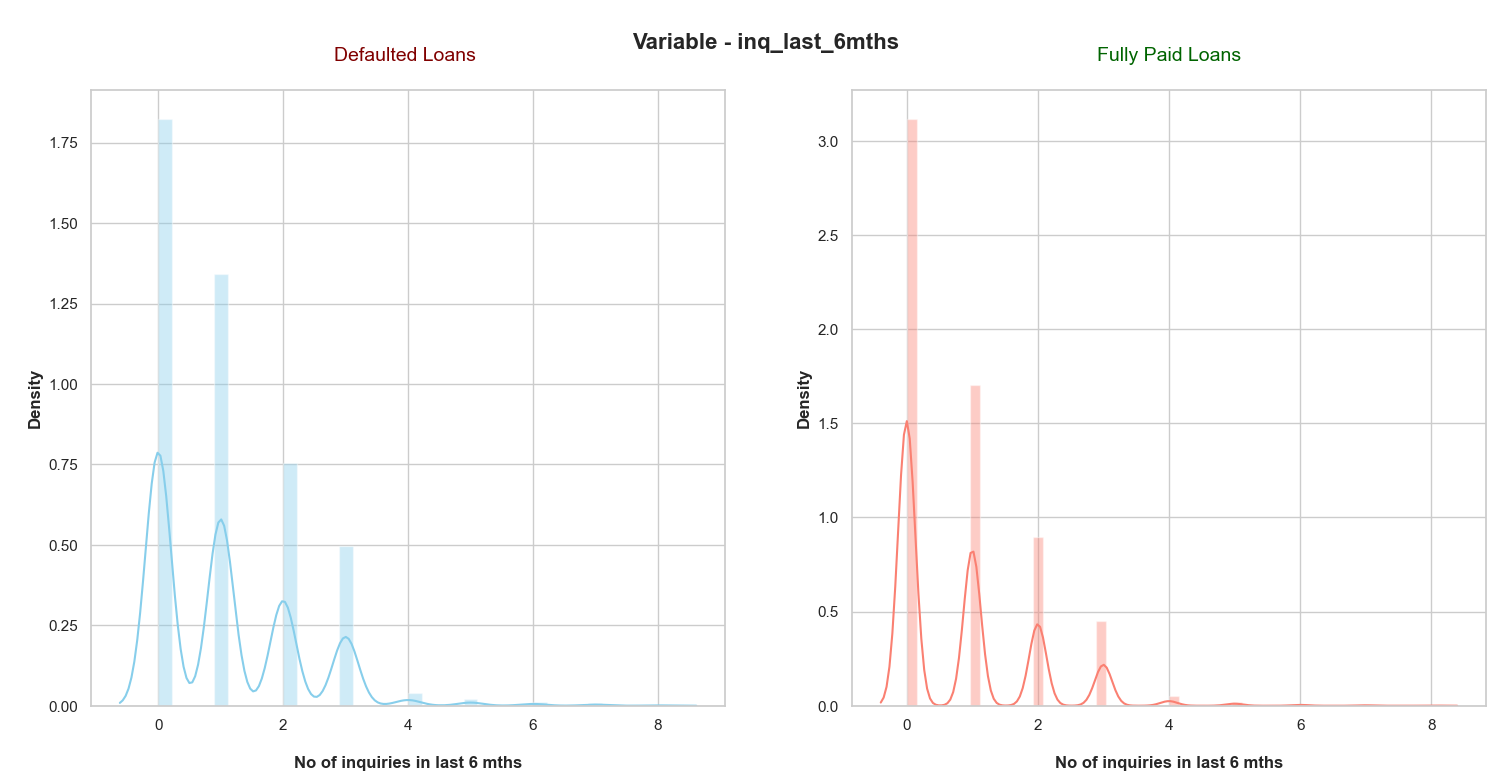

In [64]:
distribution_plot(df_default.inq_last_6mths, df_paid.inq_last_6mths, 'inq_last_6mths', 'No of inquiries in last 6 mths')

*Observation: We could see that PDC is similar for both Defaulted Loans and Fully paid loans. Therefore this column will be ignored*
<br>
<br>

---



##### inq_last_6mths
Desc: The number of open credit lines in the borrower's credit file.
<br><br>


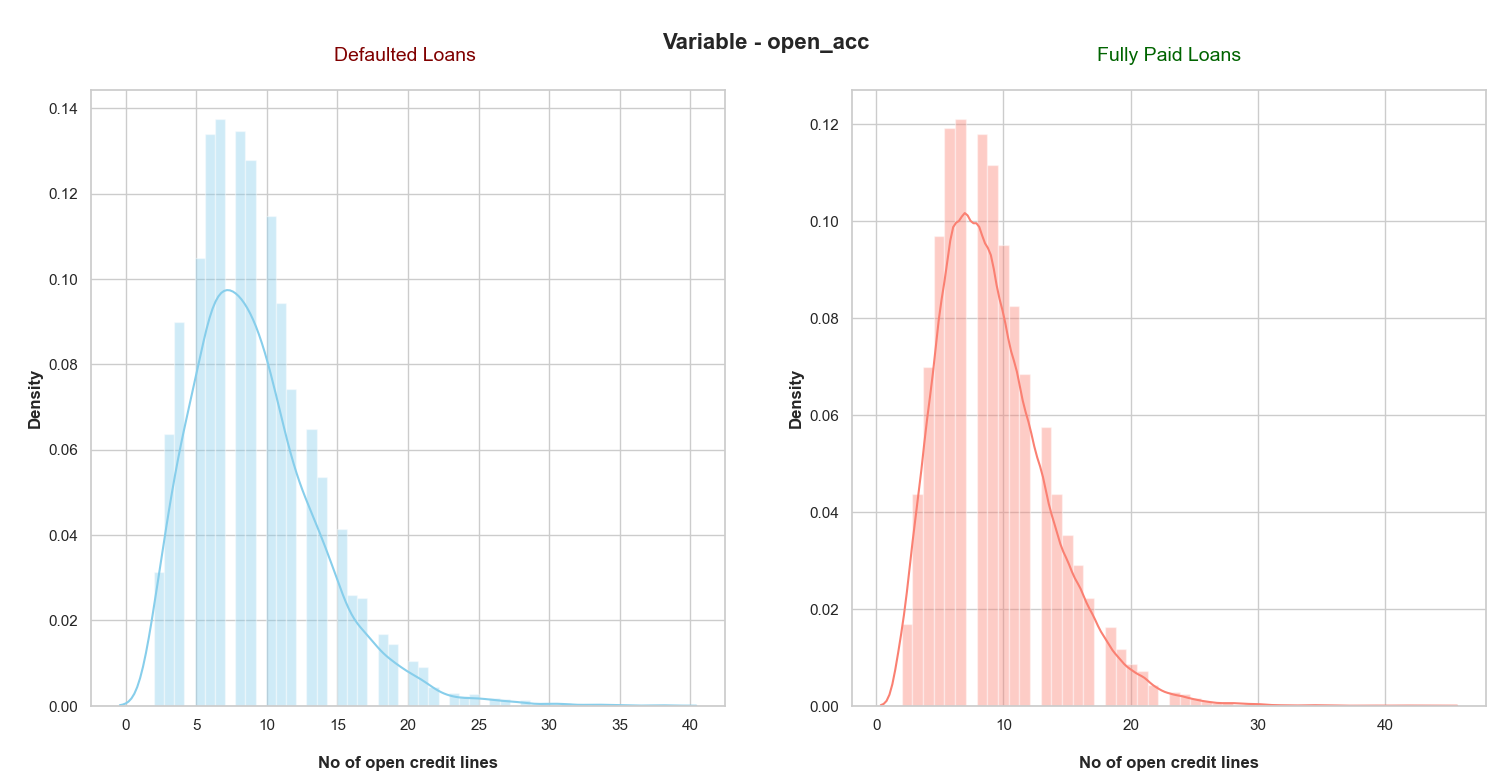

In [65]:
distribution_plot(df_default.open_acc, df_paid.open_acc, 'open_acc', 'No of open credit lines')

*Observation: We could see that PDC is similar for both Defaulted Loans and Fully paid loans. Therefore this column will be ignored*
<br>
<br>

---



##### pub_rec
Desc: Number of derogatory public records
<br><br>


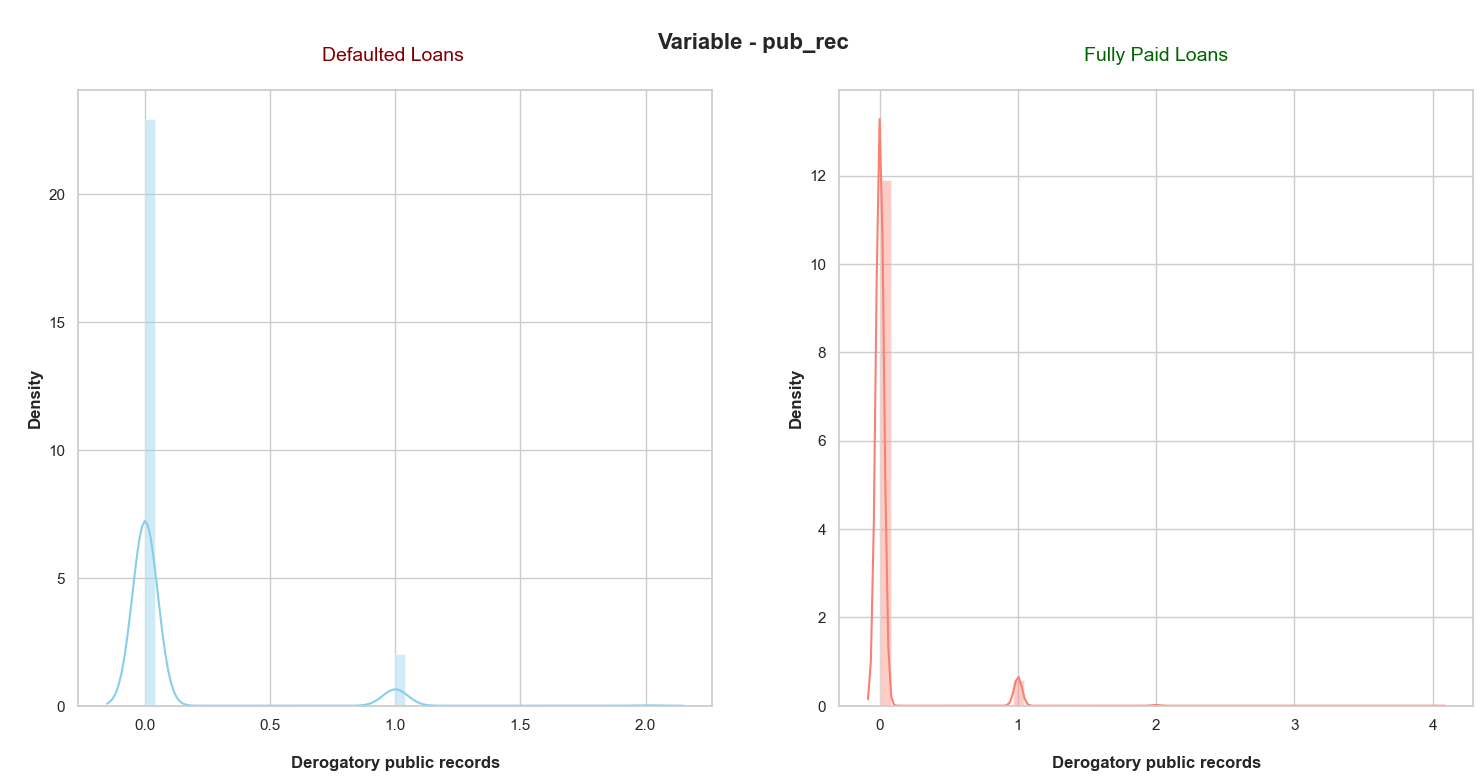

In [66]:
distribution_plot(df_default.pub_rec, df_paid.pub_rec, 'pub_rec', 'Derogatory public records')

*Observation: We could see that PDC is different. Therefore this **column will be considered***
<br>
<br>

---



##### revol_bal
Desc: Total credit revolving balance
<br><br>


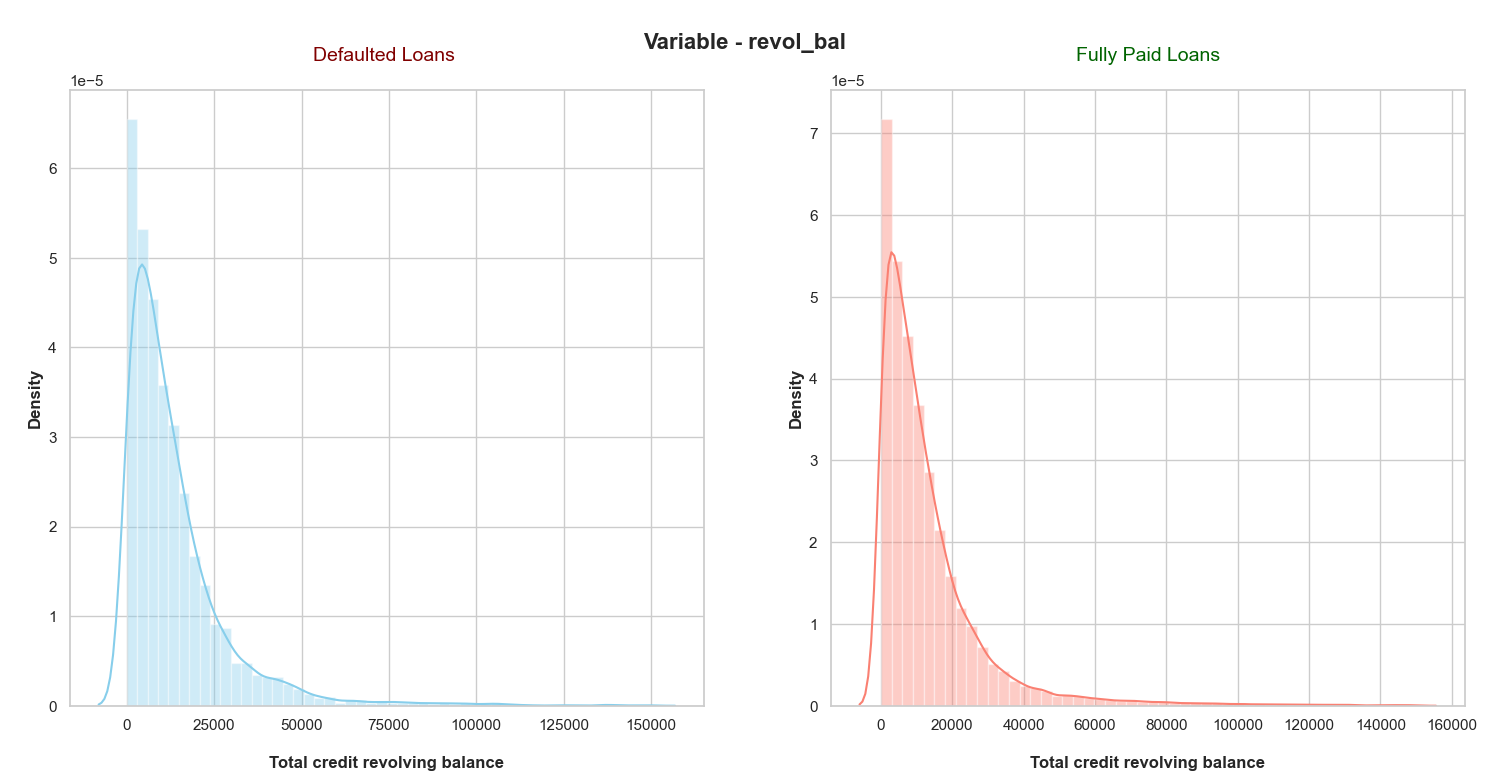

In [67]:
distribution_plot(df_default.revol_bal, df_paid.revol_bal, 'revol_bal', 'Total credit revolving balance')

*Observation: We could see that PDC is similar for both Defaulted Loans and Fully paid loans. Therefore this column will be ignored*
<br>
<br>

---



##### revol_util
Desc: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
<br><br>


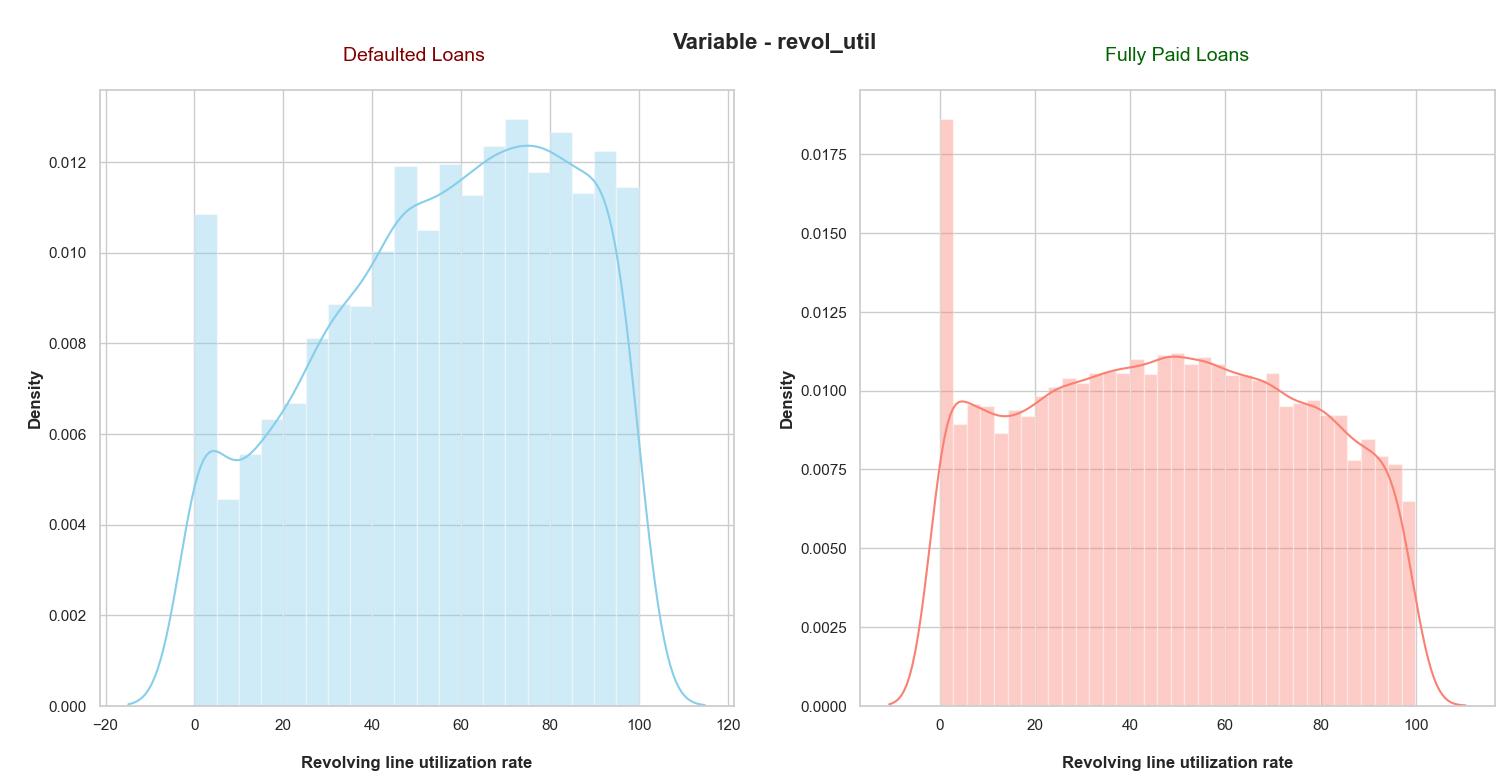

In [68]:
distribution_plot(df_default.revol_util, df_paid.revol_util, 'revol_util', 'Revolving line utilization rate')

*Observation: We could see that PDC is different. Desnity peaks especially around 60-80%.Therefore **this column will be considered***
<br>
<br>

---



##### total_acc
Desc: The total number of credit lines currently in the borrower's credit file
<br><br>


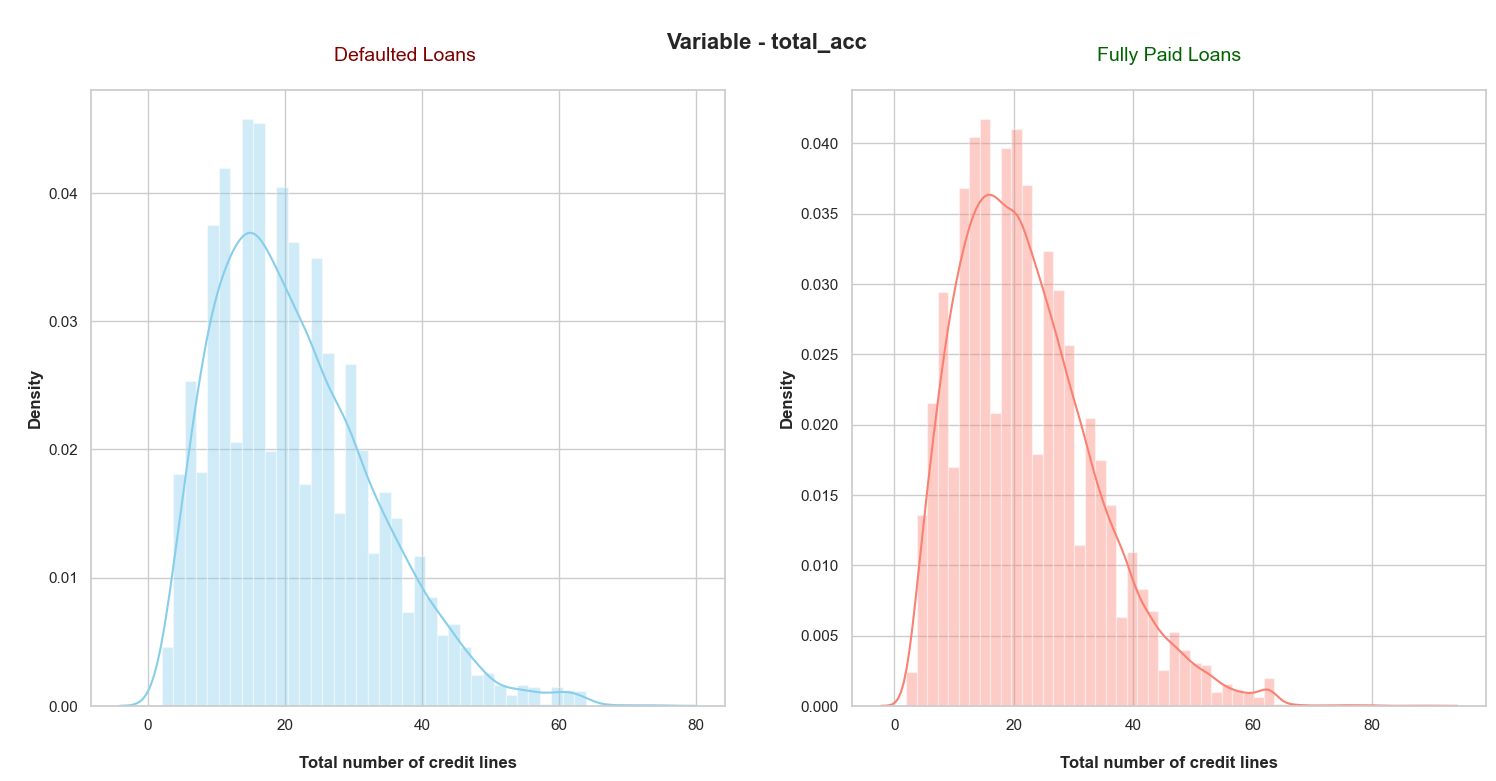

In [69]:
distribution_plot(df_default.total_acc, df_paid.total_acc, 'total_acc', 'Total number of credit lines')

*Observation: We could see that PDC is similar for both Defaulted Loans and Fully paid loans. Therefore this column will be ignored*
<br>
<br>

---



##### pub_rec_bankruptcies
Desc: Number of public record bankruptcies
<br><br>


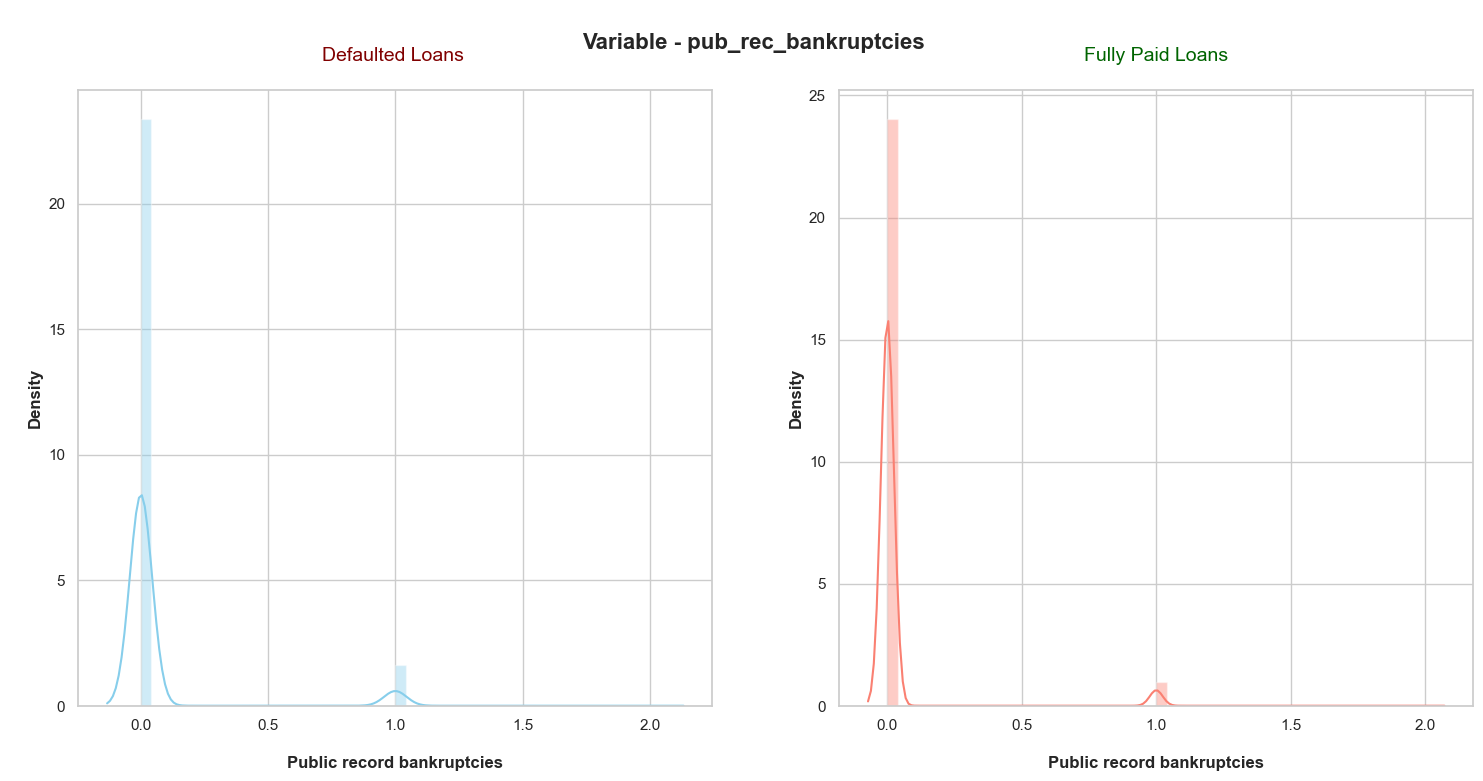

In [70]:
distribution_plot(df_default.pub_rec_bankruptcies, df_paid.pub_rec_bankruptcies, 'pub_rec_bankruptcies', 'Public record bankruptcies')

*Observation: We could see that PDC is different. Therefore **this column will be considered***
<br>
<br>

---


<h4 style = "color : #4169E1">Ordered Categorical</h4>


##### term
Desc: The number of payments on the loan. Values are in months and can be either 36 or 60.
<br><br>


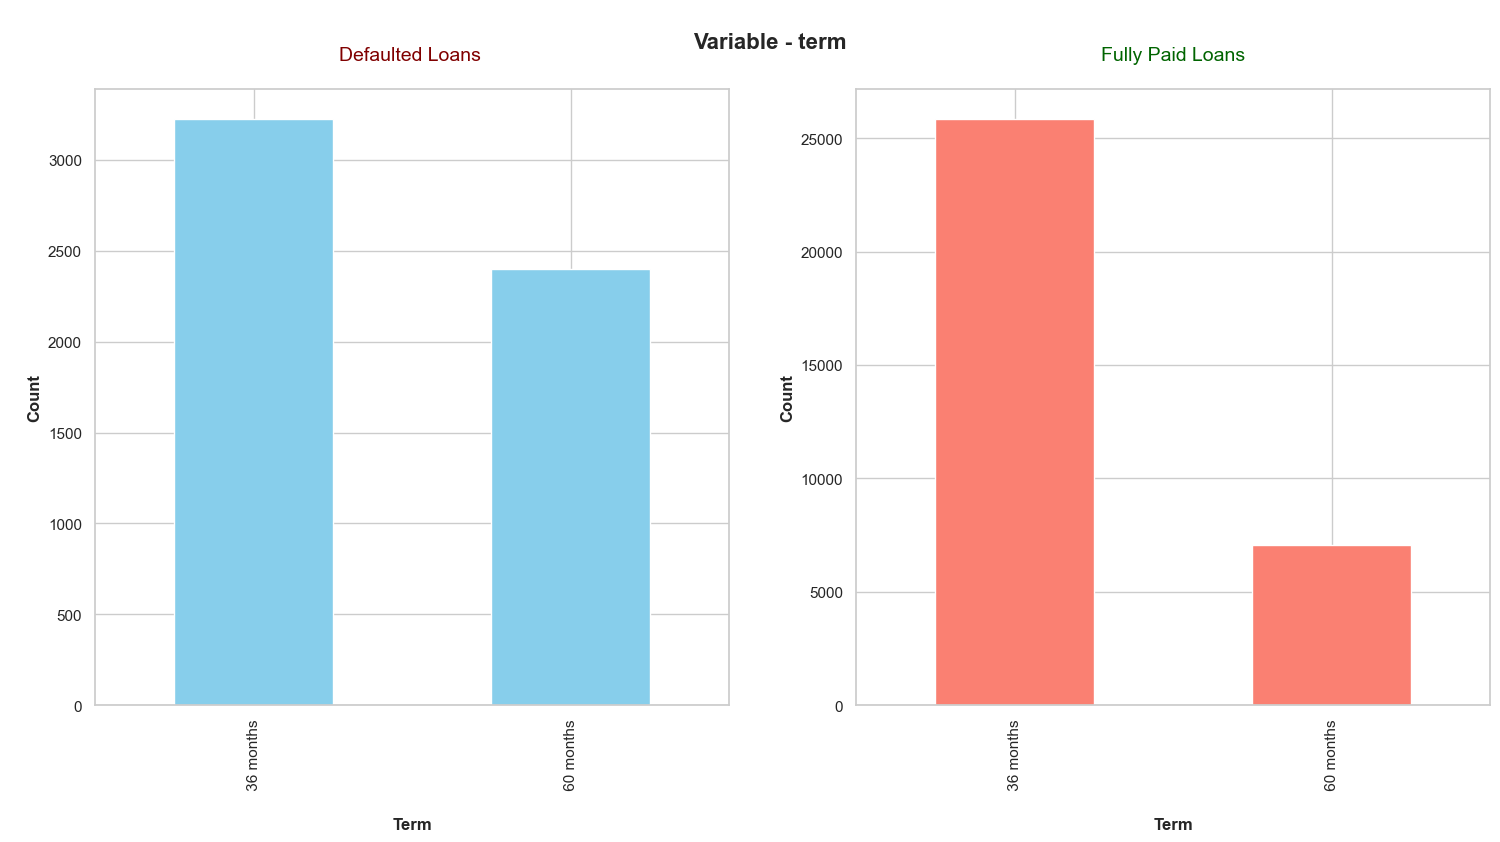

In [71]:
bar_plot(df_default.term, df_paid.term, 'term', 'Term')

*Observation: We could see that there is difference in distribution for 60 months segment, let's drill further into this. Plotting a pie chart, we could see that in case of Defaulted Loans, 60 months term contributes a lot compared to Fully paid. This **variable is considered for driver variables***
<br>
<br>

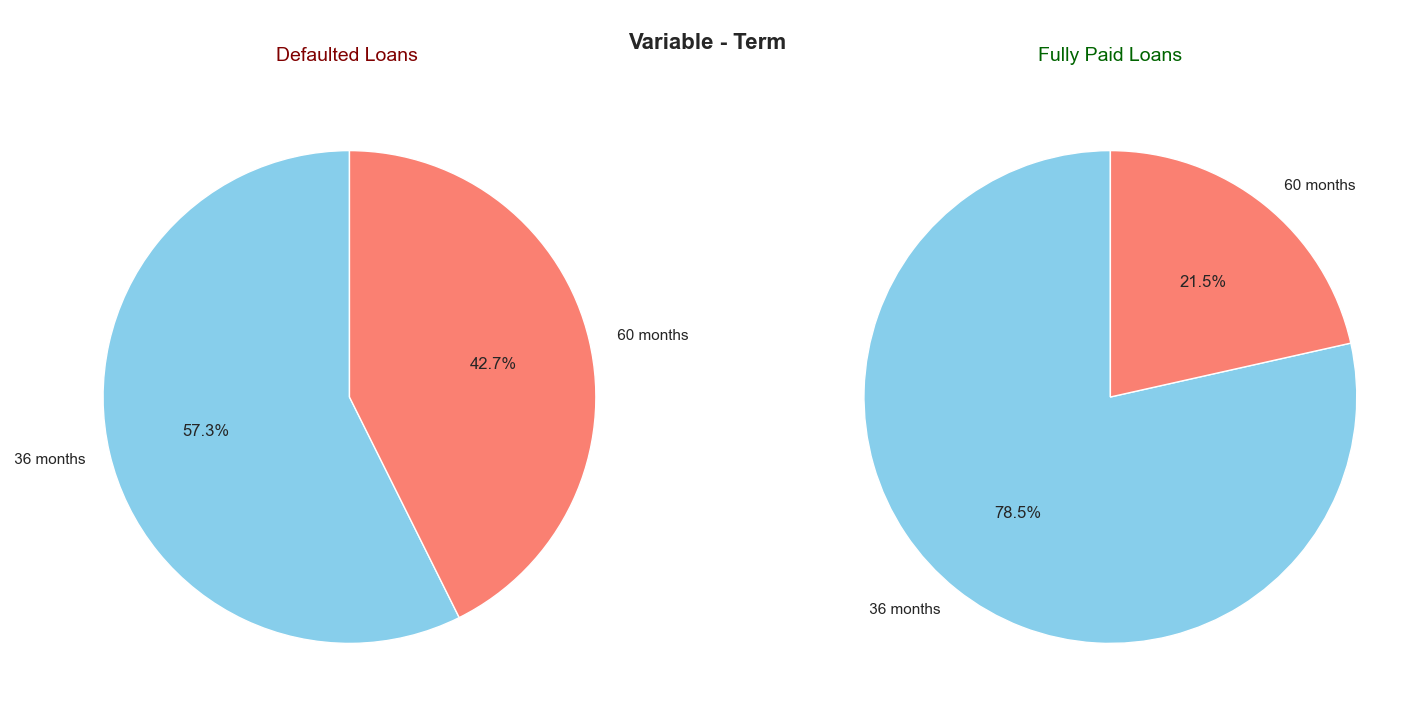

In [72]:
pie_chart(df_default.term, df_paid.term, 'Term')

---



##### int_rate
Desc: Interest Rate on the loan
<br><br>


In [73]:
df_default.int_rate.unique()

array([15.27, 21.28, 12.69, 13.49, 10.65, 12.42, 11.71, 14.27, 16.77,
        8.9 ,  9.91, 15.96, 19.91, 17.27, 18.25,  6.62, 14.65,  7.51,
       20.89, 16.29,  7.9 , 20.3 , 18.64, 19.42, 17.58, 23.13, 22.74,
       19.03, 22.35, 21.67, 22.06,  6.03, 23.91, 23.52, 24.11, 18.79,
       11.49, 15.23,  5.42,  7.49,  9.99, 19.29, 13.99, 15.99, 11.99,
       12.99, 16.49,  6.99, 14.79, 18.39, 17.49, 15.62, 19.69, 20.25,
       10.99, 10.59, 22.85, 21.36,  5.99,  8.49, 16.89, 17.99, 20.62,
       21.74, 22.48, 20.99, 22.11, 23.59, 23.22, 18.07, 20.2 , 22.64,
       13.84, 16.11, 12.12, 19.39, 21.82,  7.91, 11.63,  7.42, 20.69,
       22.94, 24.4 , 17.19, 16.59, 16.02, 14.91, 13.43, 15.28, 17.14,
       11.11, 17.51, 10.74, 10.37, 10.  , 18.62,  7.66,  9.63,  5.79,
       13.06, 15.65, 12.68, 20.11, 13.8 , 14.54, 16.4 , 20.48, 14.17,
       19.36,  6.92, 17.88,  7.29, 19.74, 18.99, 21.22, 20.85, 21.59,
        6.91, 12.61, 15.95, 13.72, 14.46, 10.36, 15.2 ,  6.54, 16.32,
       15.57, 20.03,

Text(0, 0.5, 'Density')

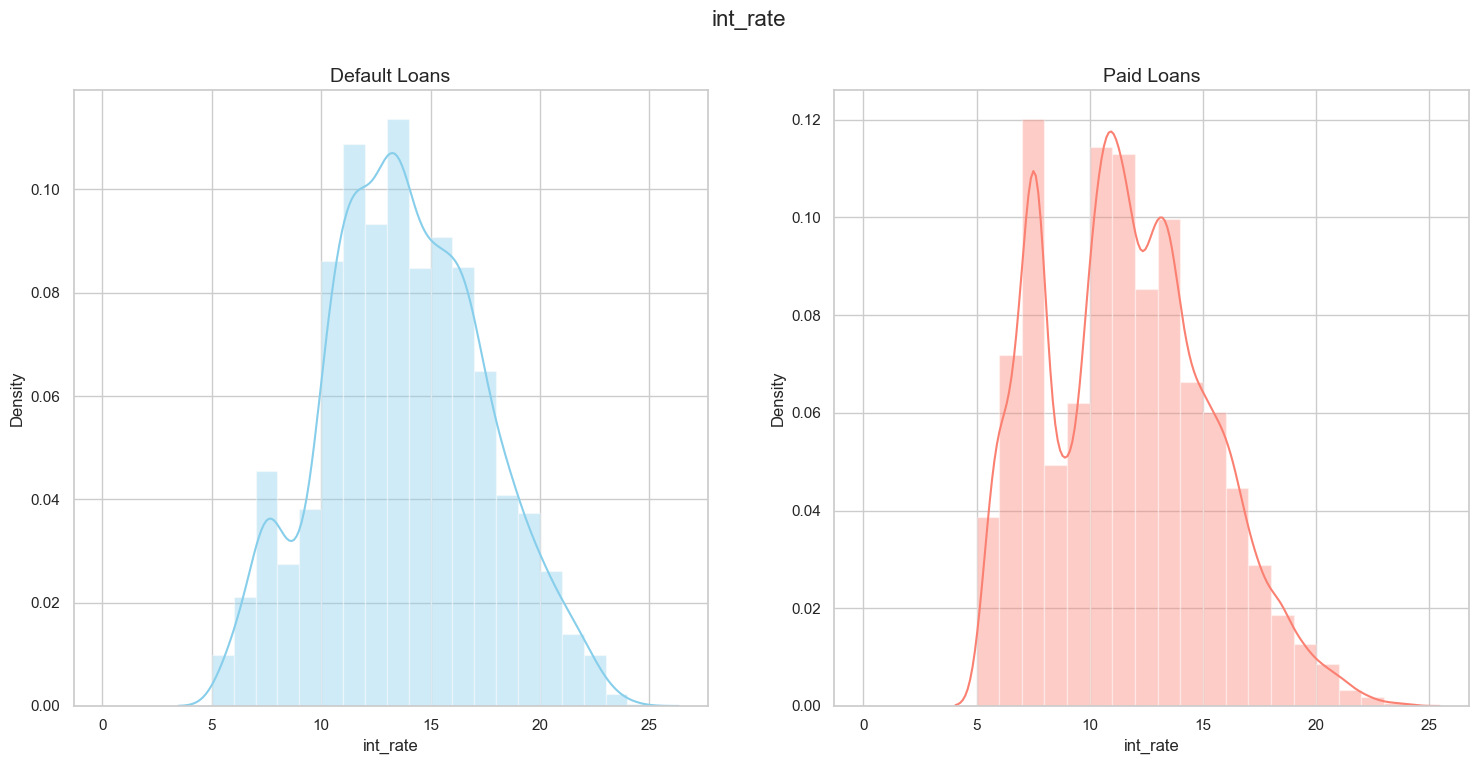

In [74]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
fig.suptitle("int_rate", fontsize=16)

default_color='skyblue'
paid_color='salmon'

sns.distplot(df_default.int_rate, bins=range(0, int(max(df_default.int_rate)) + 2),  color=default_color, ax=axes[0])
sns.distplot(df_paid.int_rate, bins=range(0, int(max(df_paid.int_rate)) + 2), color=paid_color, ax=axes[1])
y_label='Density'
x_label='int_rate'
#sns.distplot(df_default.int_rate, bins=range(0, int(max(df_default.int_rate)) + 2))

axes[0].set_title('Default Loans', fontsize=14)
axes[0].set_xlabel(x_label, fontsize=12)
axes[0].set_ylabel(y_label, fontsize=12)

axes[1].set_title('Paid Loans', fontsize=14)
axes[1].set_xlabel(x_label, fontsize=12)
axes[1].set_ylabel(y_label, fontsize=12)

*Observation: We could see that there is difference in PDC, IN fully paid loans, there is a dip at 8, 9% but in default it a steady spike. Lets **consider this variable as driver variable***
<br>
<br>

In [75]:
def group_column_chart1(variable_order, default_variable, paid_variable, main_title, x_label):
   
    
    def_variable_counts = default_variable.value_counts()
    paid_variable_counts = paid_variable.value_counts()
    
   
    def_variable_counts = def_variable_counts.reindex(variable_order)
    paid_variable_counts = paid_variable_counts.reindex(variable_order)
    
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(12, 8))
    width = 0.35  # Width of the bars
    
    # Position of bars on x-axis
    bar_positions = range(len(variable_order))
    
    
    ax.bar(bar_positions, def_variable_counts, width, label='Default Loans', color='skyblue')
    ax.bar([p + width for p in bar_positions], paid_variable_counts, width, label='Paid Loans', color='salmon')
    
    # Set labels and title
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(main_title, fontsize=16)
    ax.set_xticks([p + width/2 for p in bar_positions])  
    ax.set_xticklabels(variable_order, rotation=45, ha='right')  
    
    
    ax.legend()
    
    
    plt.tight_layout()
    plt.show()
 

---



##### issue_d
Desc: The month which the loan was funded 
<br><br>


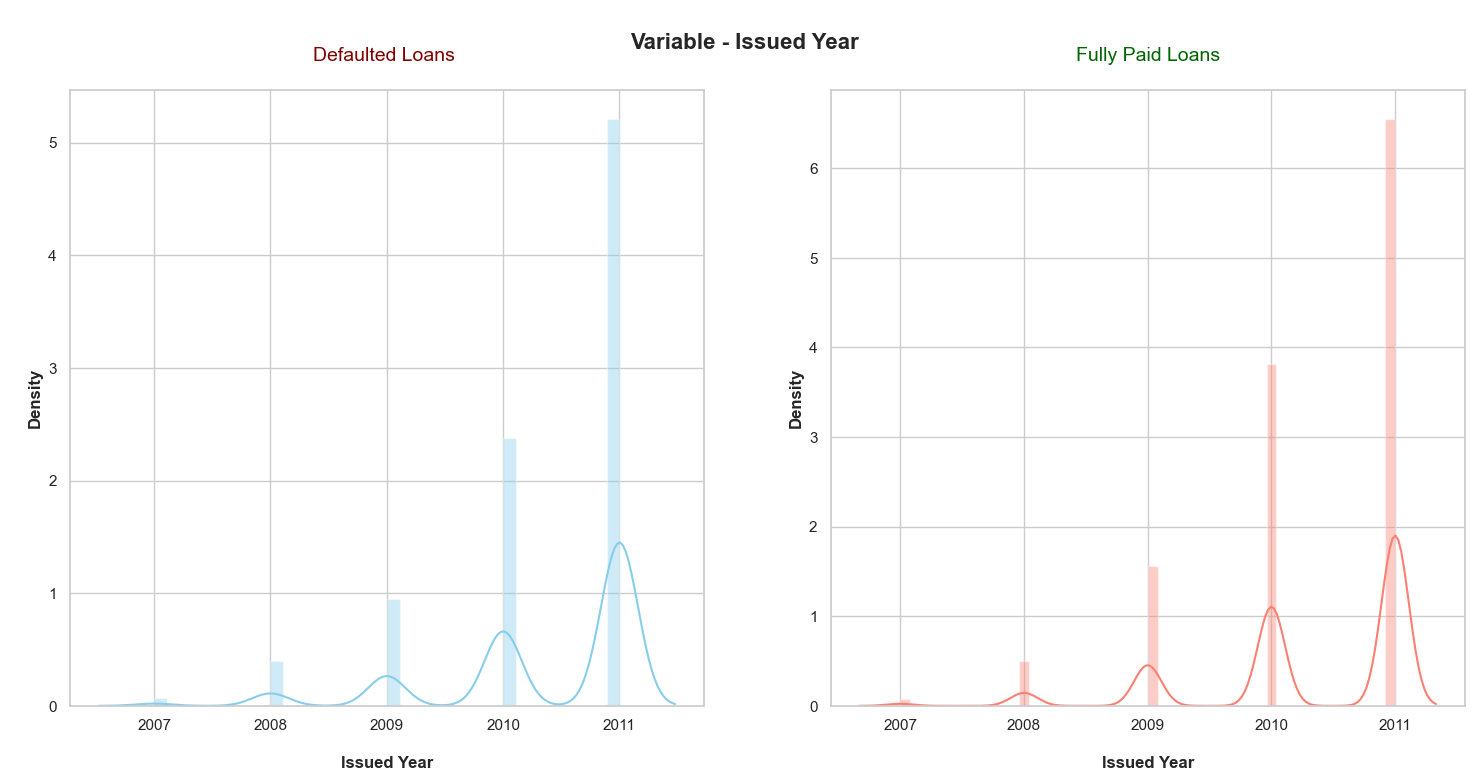

In [76]:
distribution_plot(df_default.issue_d.dt.year, df_paid.issue_d.dt.year, 'Issued Year', 'Issued Year')

*Observation: We could see that PDC is similar for both Defaulted Loans and Fully paid loans. Therefore this column will be ignored*
<br>
<br>

---



##### earliest_cr_line
Desc: The month the borrower's earliest reported credit line was opened
<br><br>


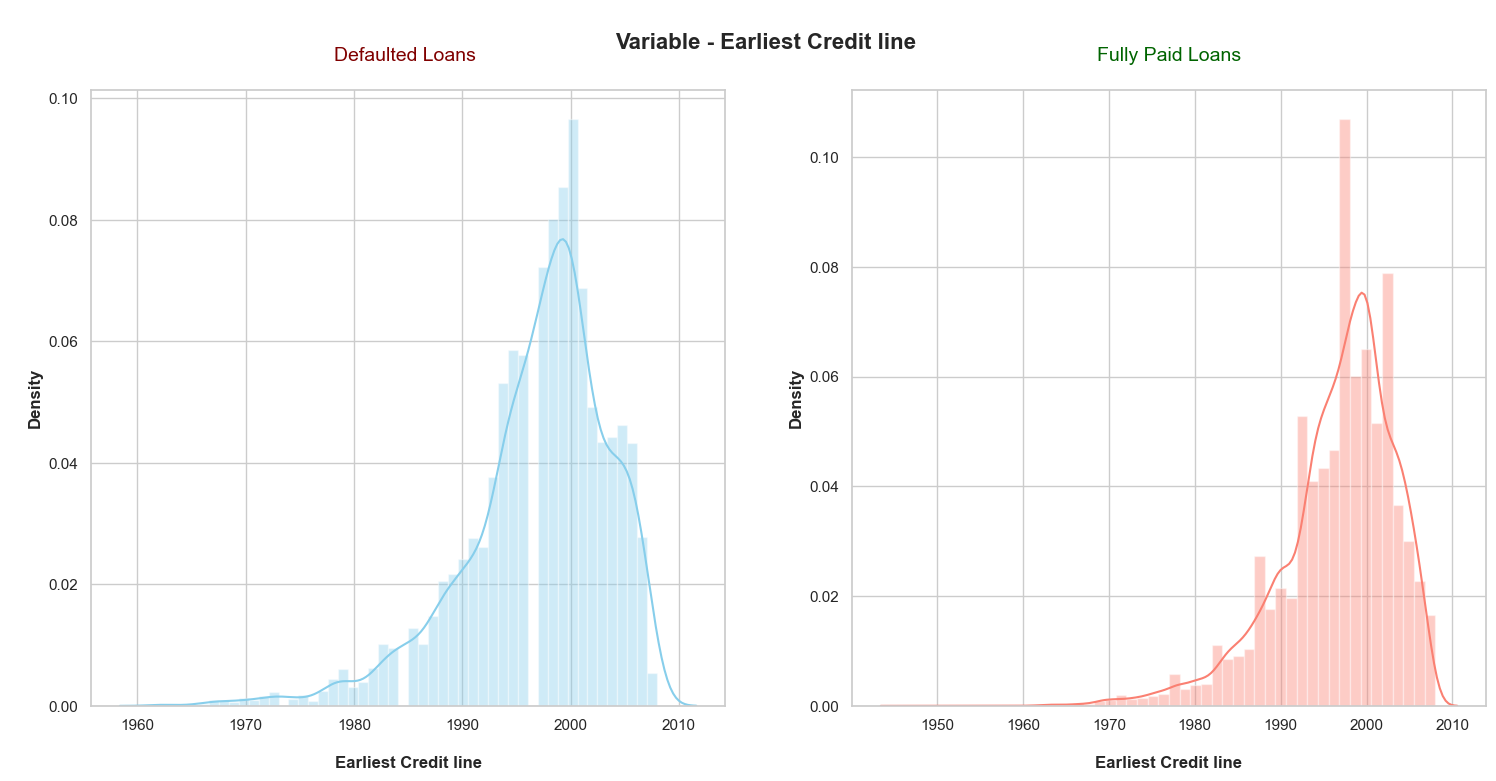

In [77]:
distribution_plot(df_default.earliest_cr_line.dt.year, df_paid.earliest_cr_line.dt.year, 'Earliest Credit line', 'Earliest Credit line')

*Observation: We could see that PDC is similar for both Defaulted Loans and Fully paid loans. Therefore this column will be ignored*
<br>
<br>

---



##### emp_length
Desc: Employment length in years.
<br><br>


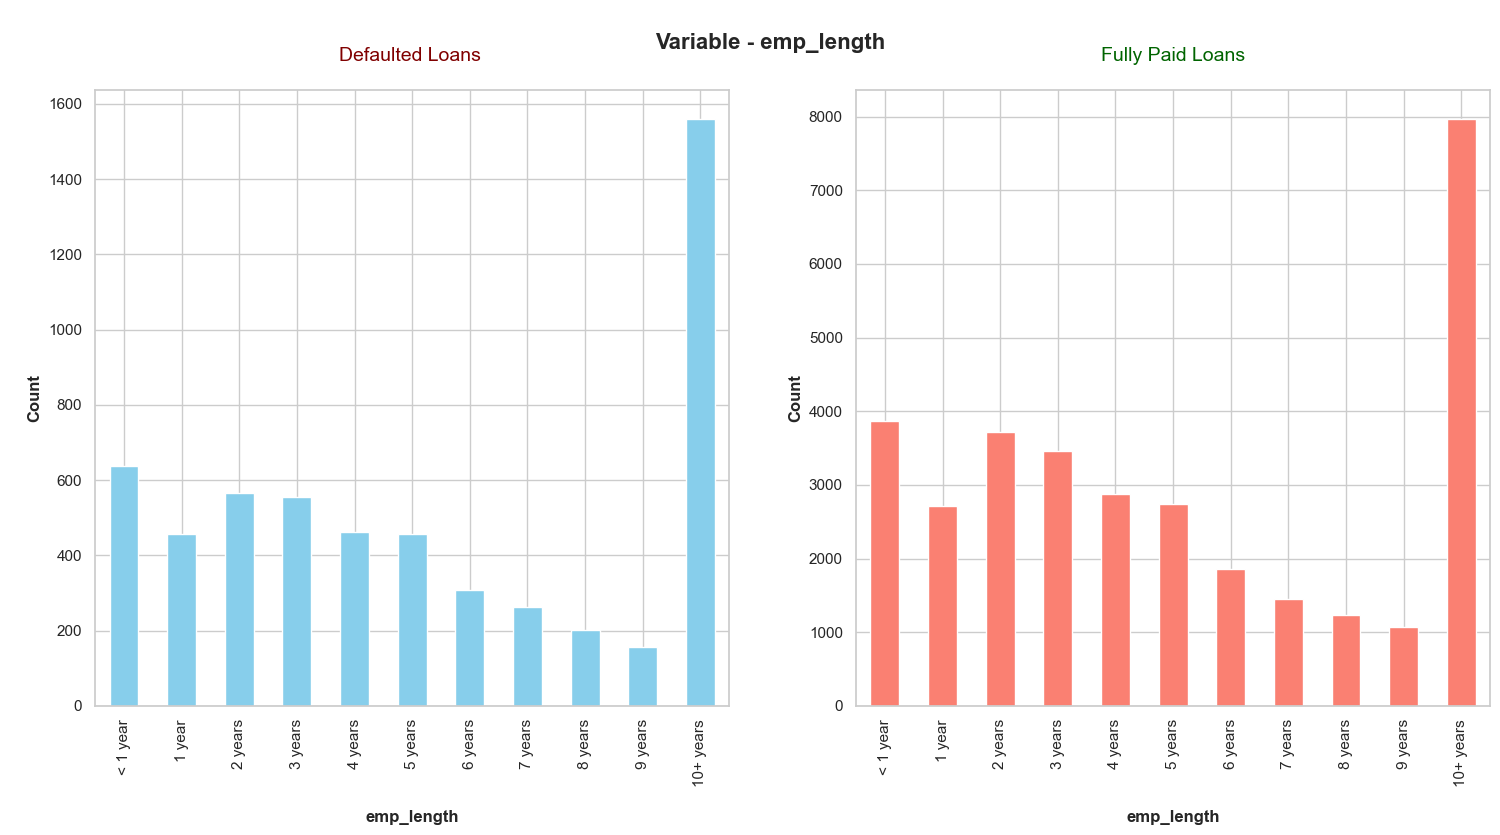

In [78]:
emp_length_order = [
     '< 1 year', '1 year', '2 years', '3 years','4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'
    ]
bar_plot_ordered(emp_length_order,df_default.emp_length, df_paid.emp_length, 'emp_length', 'emp_length')

*Observation: We dont see a difference in the pattern. Therefore this column will be ignored*
<br>
<br>

---


<h4 style = "color : #4169E1">Unordered categories</h4>


##### grade
Desc: LC assigned loan grade
<br><br>


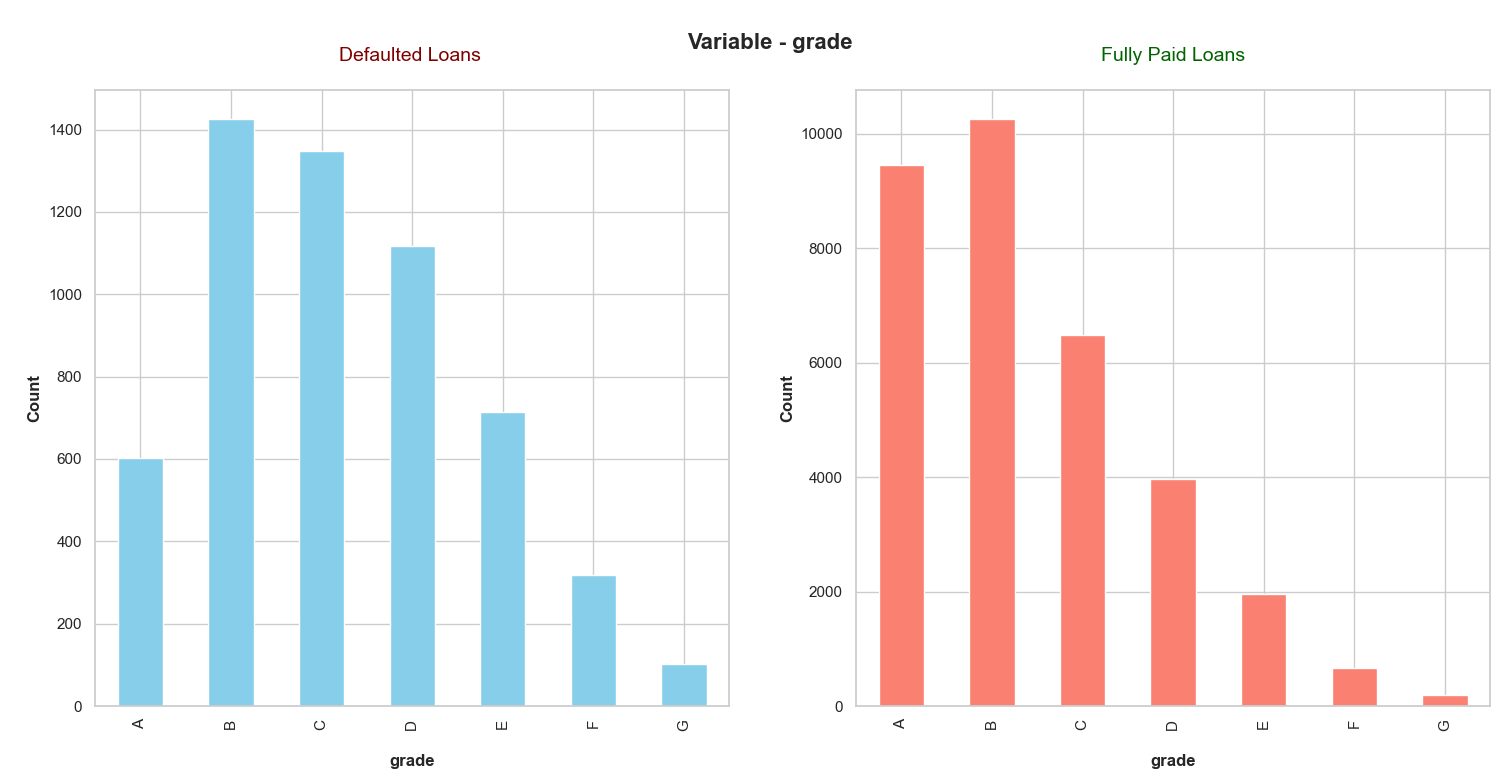

In [79]:
grade_order = [
     'A', 'B', 'C', 'D','E', 'F', 'G'
    ]
bar_plot_ordered(grade_order,df_default.grade, df_paid.grade, 'grade', 'grade')

*Observation: We can see a difference in the pattern especially for Grade A Therefore this column will be considered*
<br>
<br>
To drill further, lets plot this in a group line chart, we could see that the difference in the line plot. The difference b/w paid and default keeps reducing towards right of the plot.Therefore lets **consider this column for driver variable**

In [80]:
def group_line(variable):
    fig, ax=plt.subplots(figsize=(18, 8))
    fig.suptitle('\nVariable - ' + variable, fontsize=16, fontweight='bold')
    counts_paid= df_paid.groupby([variable])[["emp_length"]].count()
    counts_default= df_default.groupby([variable])[["emp_length"]].count()
    
    counts_paid.reset_index(inplace=True)
    counts_default.reset_index(inplace=True)
    
    default, = ax.plot(counts_default[variable], counts_default["emp_length"] )
    paid, = ax.plot(counts_paid[variable], counts_paid["emp_length"] )
    default.set_label("default")
    paid.set_label("paid")
    ax.set_xlabel(variable, fontsize=14, fontweight='bold')  # Adding xlabel
    ax.set_ylabel('Count of ' + variable, fontsize=14, fontweight='bold') 
    plt.legend()

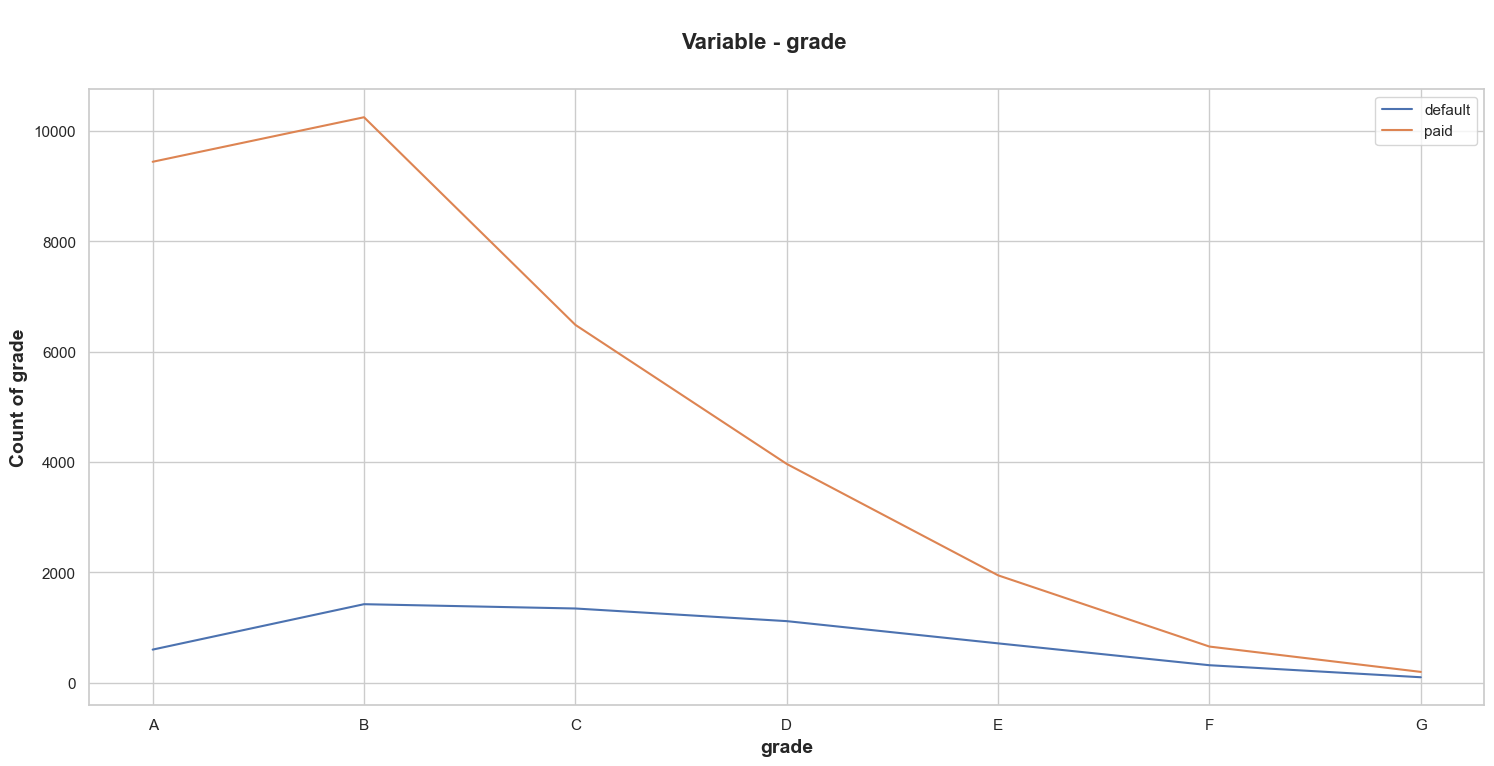

In [81]:
group_line('grade')

---



##### sub_grade
Desc: LC assigned loan subgrade
<br><br>


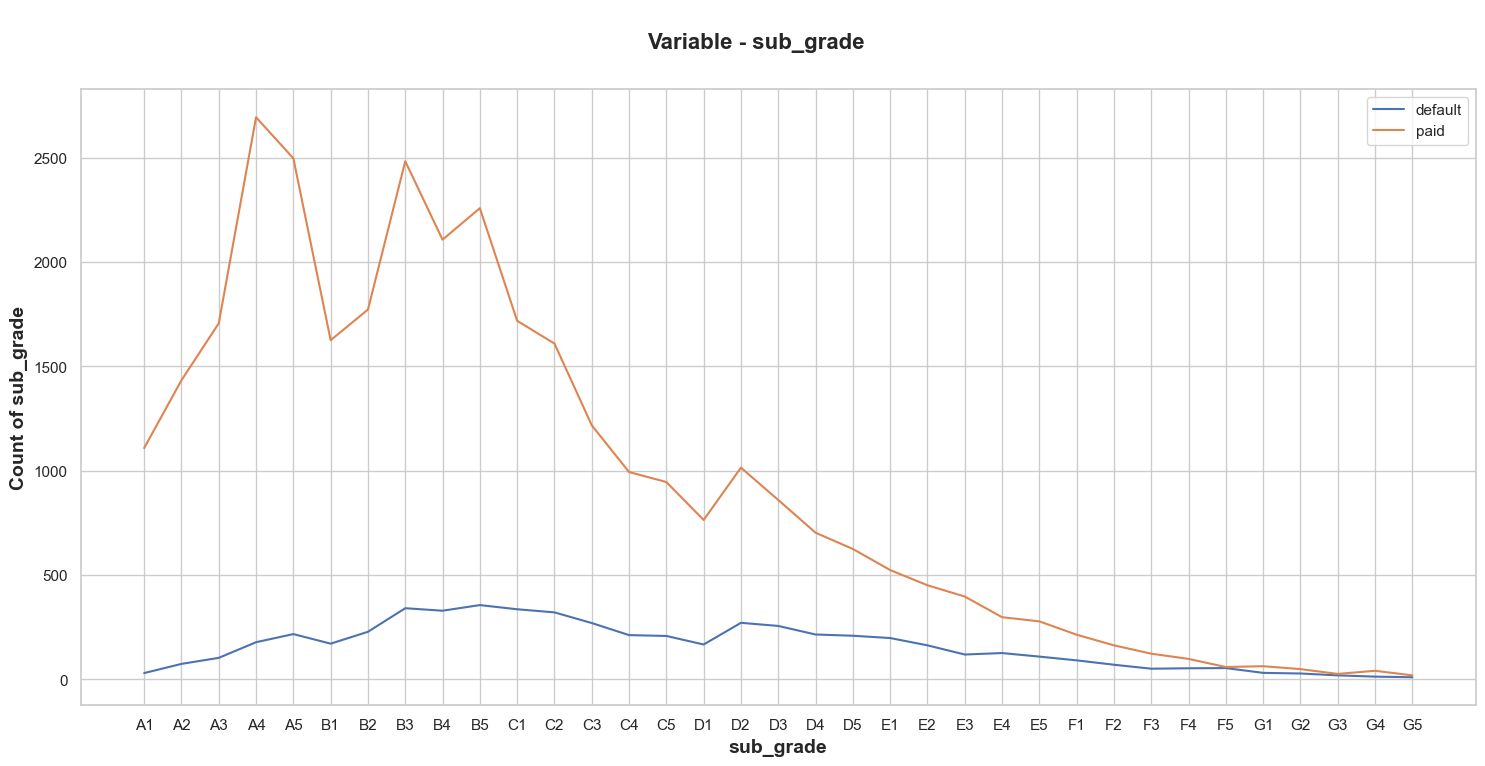

In [82]:
group_line('sub_grade')

Observation: similar pattern like observed in grade. Therefore this column will be considered as a driver variable

---



##### home_ownership
Desc: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
<br><br>


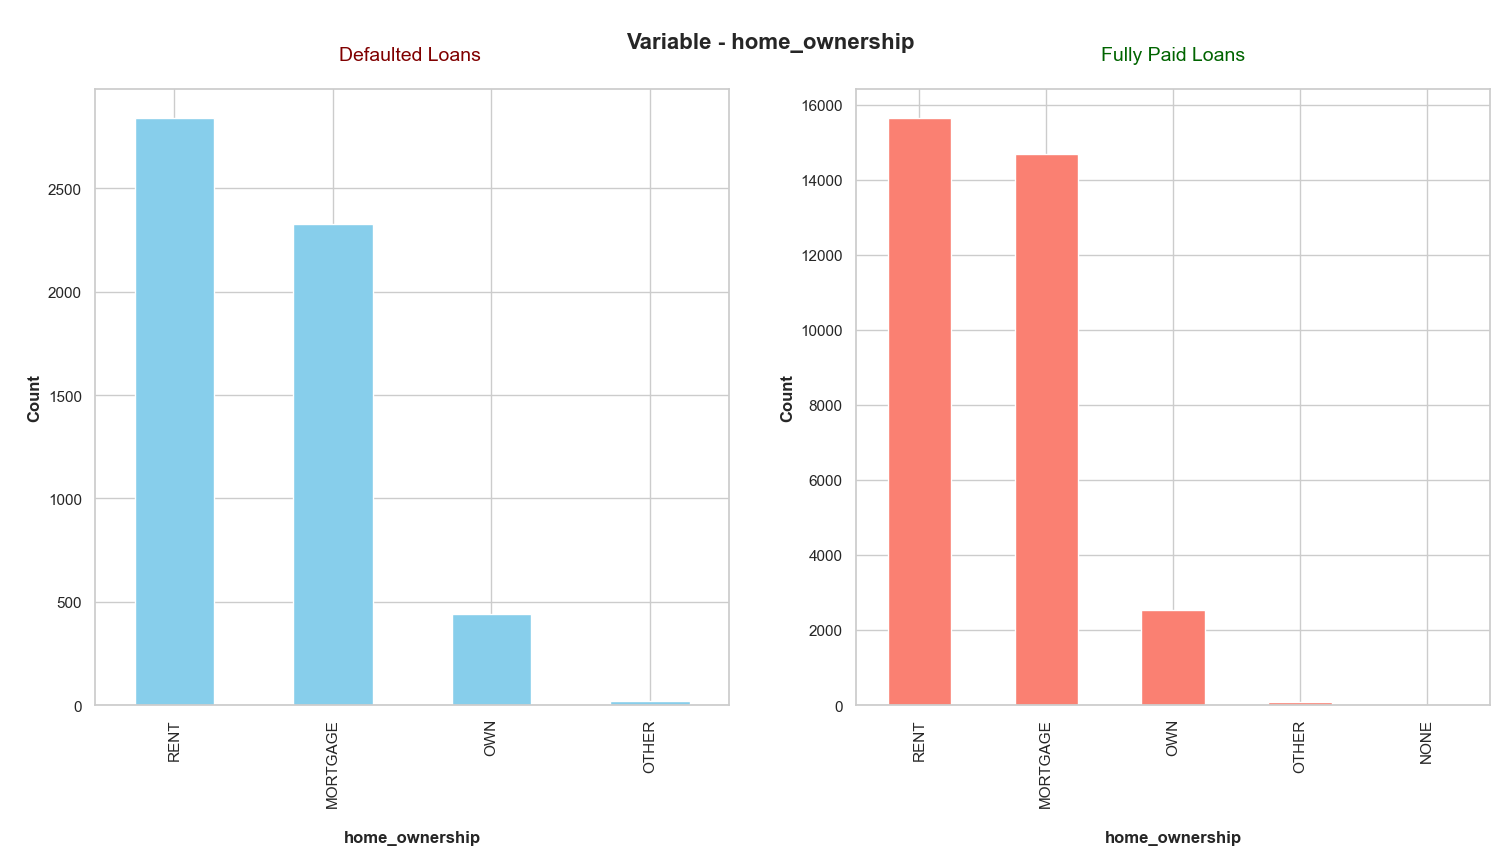

In [83]:
bar_plot(df_default.home_ownership, df_paid.home_ownership, 'home_ownership', 'home_ownership')


Observation: We could see a differene in pattern especially for mortage, lets dig further with Pipe chart. The disribution is almost equal, so we can ignore this column. Also, there is one additional value none in paid loans, that we can rename to others for data sanity. since we are not considering this columns, we will ignore it


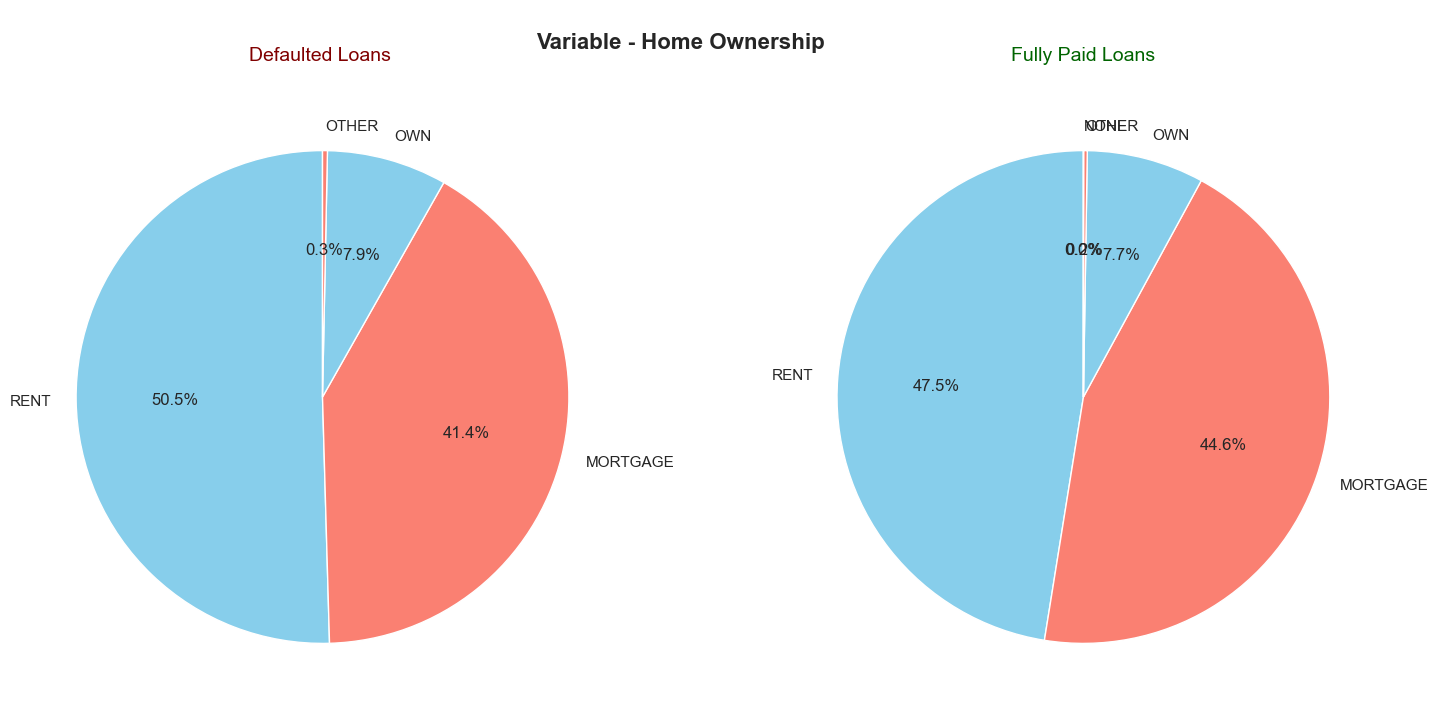

In [84]:
pie_chart(df_default.home_ownership, df_paid.home_ownership, 'Home Ownership')

---



##### verification_status
Desc: Indicates if income was verified by LC, not verified, or if the income source was verified
<br><br>


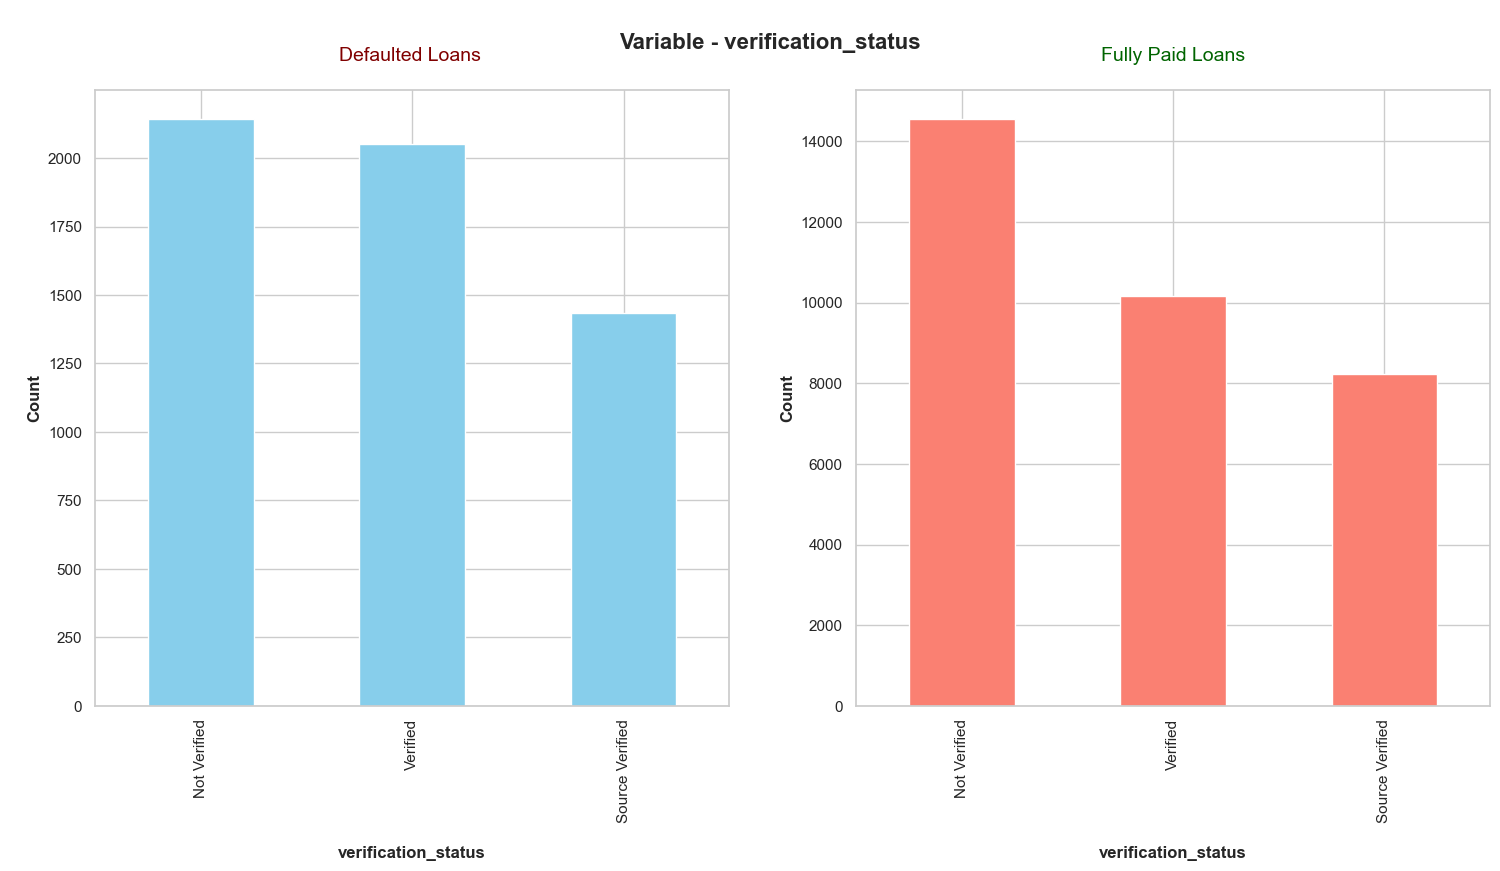

In [85]:
bar_plot(df_default.verification_status, df_paid.verification_status, 'verification_status', 'verification_status')


Observation: We could see a differene in pattern especially for verified, lets dig further with Pipe chart. The disribution might look similar,but there is a 6% share difference b/w verified and non-verified. Therefore lets consider this variable for driver variable.


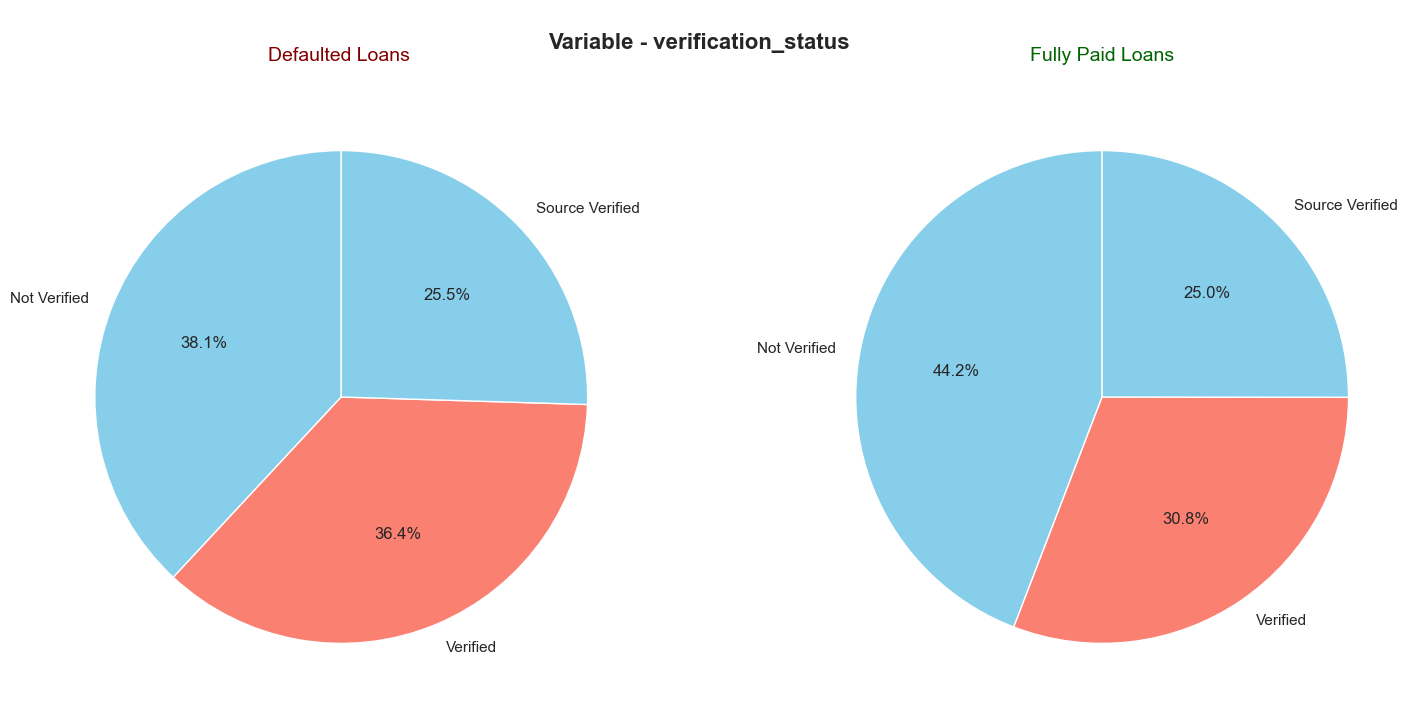

In [86]:
pie_chart(df_default.verification_status, df_paid.verification_status, 'verification_status')

---



##### purpose
Desc: A category provided by the borrower for the loan request. 
<br><br>


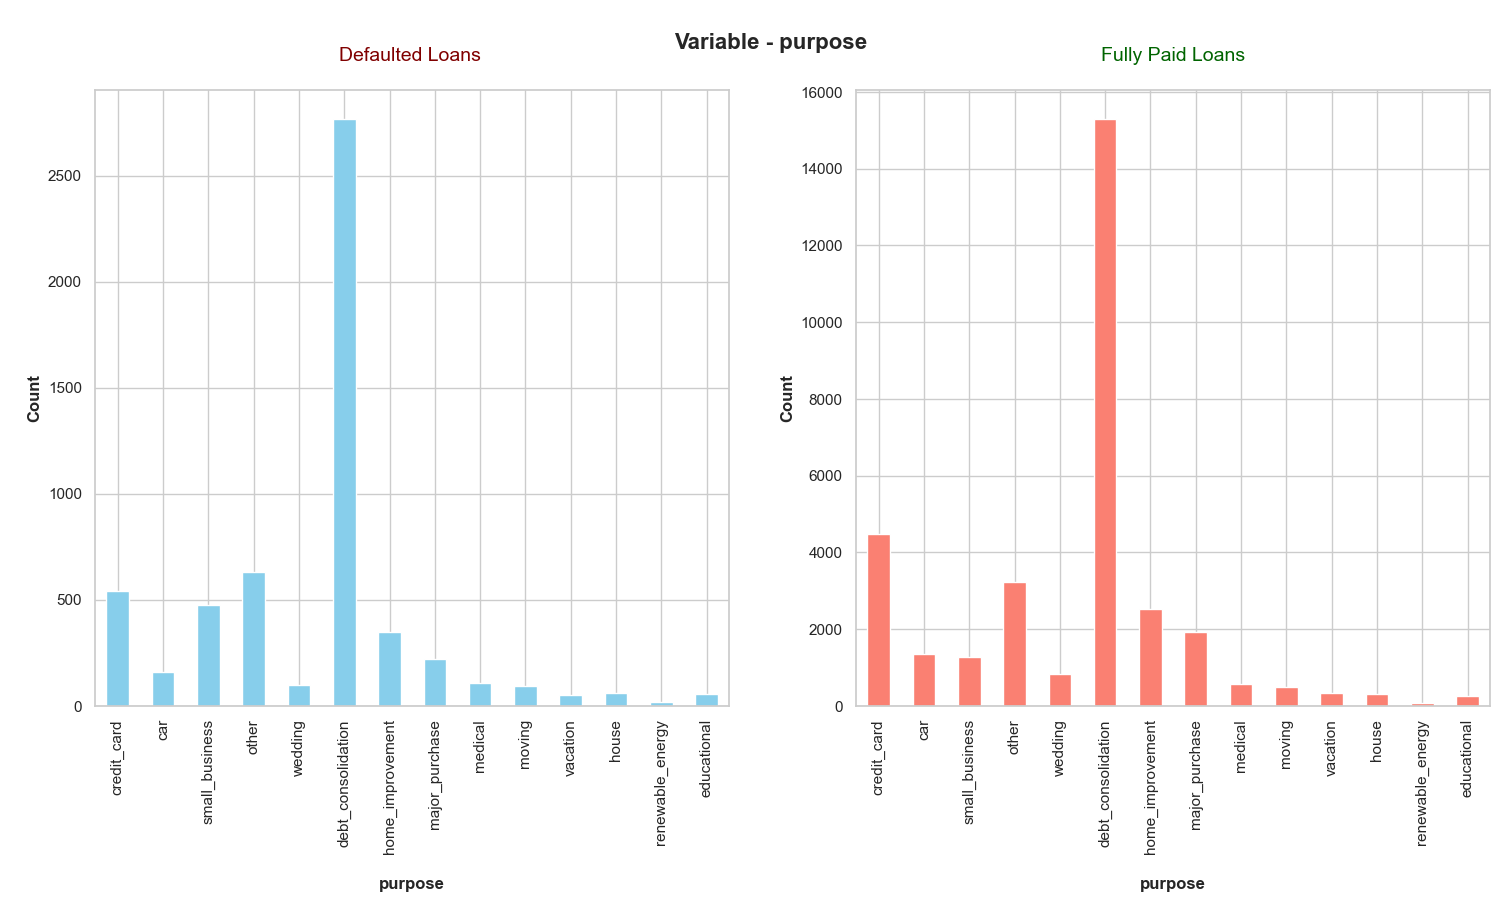

In [87]:
purpose_order = df['purpose'].unique()
bar_plot_ordered(purpose_order,df_default.purpose, df_paid.purpose, 'purpose', 'purpose')

Observation: The pattern might look similar, but looking closely, we could see small _business proposition is high in Defaulted loans than fully paid.
Plotting it in group column chart, we could see the count of small_business defaulters is 50% euivalent to that of paid ones. Debt consolidation seems to be safer one. Therefore, **lets consider this variable as well to investigate further.**

In [88]:
def group_column_chart(variable_order, default_variable, paid_variable, main_title, x_label):
    def_variable_counts = default_variable.value_counts()
    paid_variable_counts = paid_variable.value_counts()
    
   
    def_variable_counts = def_variable_counts.reindex(variable_order)
    paid_variable_counts = paid_variable_counts.reindex(variable_order)
    
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(18, 8))
    width = 0.35  # Width of the bars
    
    # Position of bars on x-axis
    bar_positions = range(len(variable_order))
    
    
    ax.bar(bar_positions, def_variable_counts, width, label='Default Loans', color='skyblue')
    ax.bar([p + width for p in bar_positions], paid_variable_counts, width, label='Paid Loans', color='salmon')
    
    # Set labels and title
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(main_title, fontsize=16)
    ax.set_xticks([p + width/2 for p in bar_positions])  
    ax.set_xticklabels(variable_order, rotation=45, ha='right')  
    
    
    ax.legend()
    
    
    plt.tight_layout()
    plt.show()


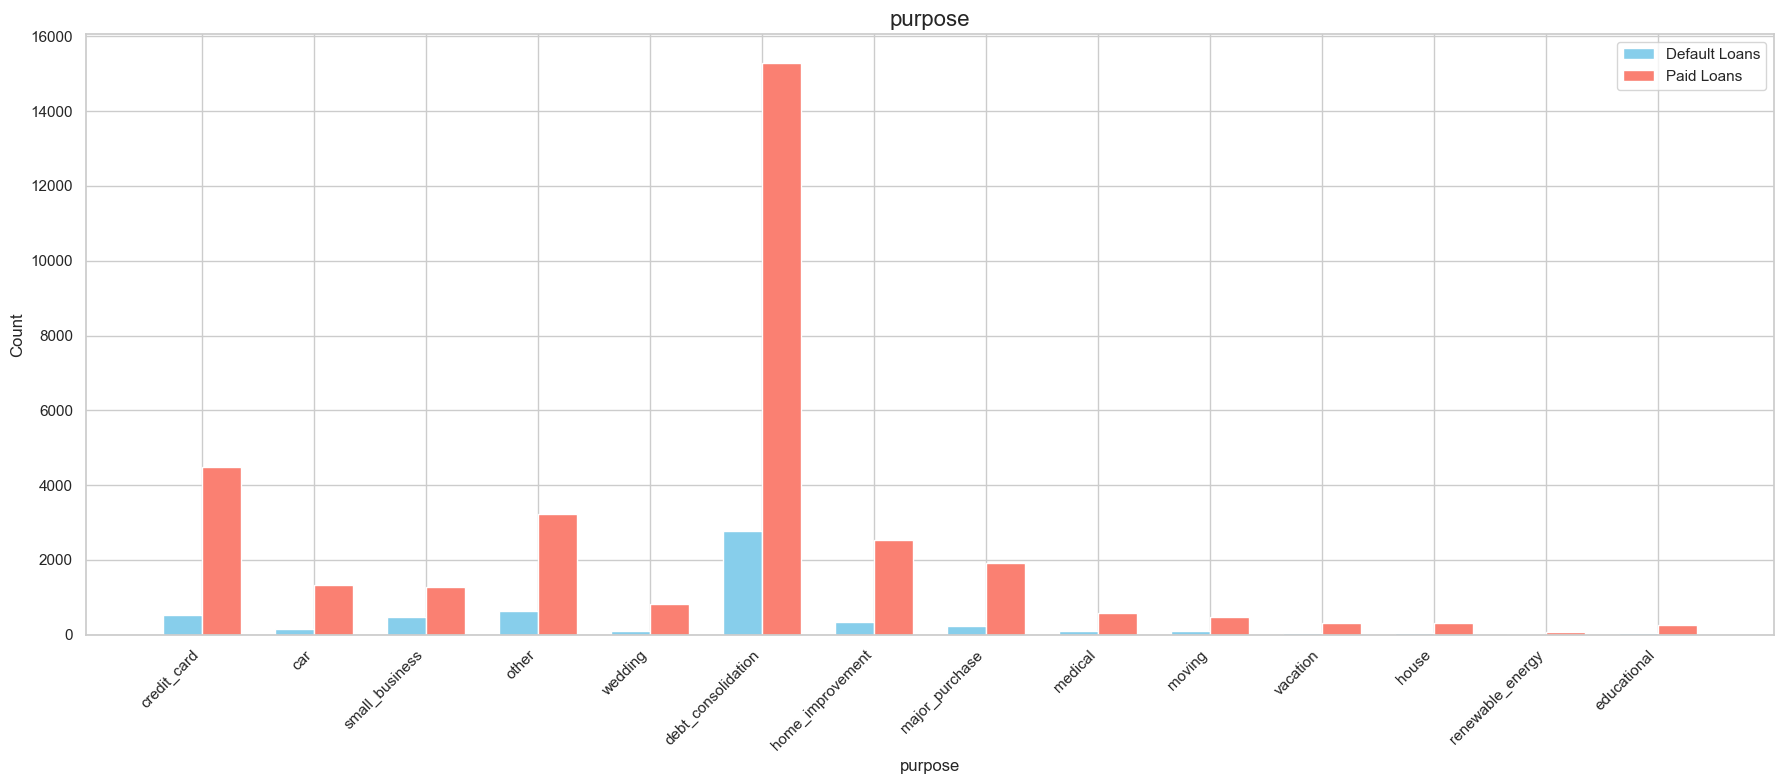

In [89]:
purpose_order = df['purpose'].unique()
group_column_chart(purpose_order,df_default.purpose, df_paid.purpose, 'purpose', 'purpose')

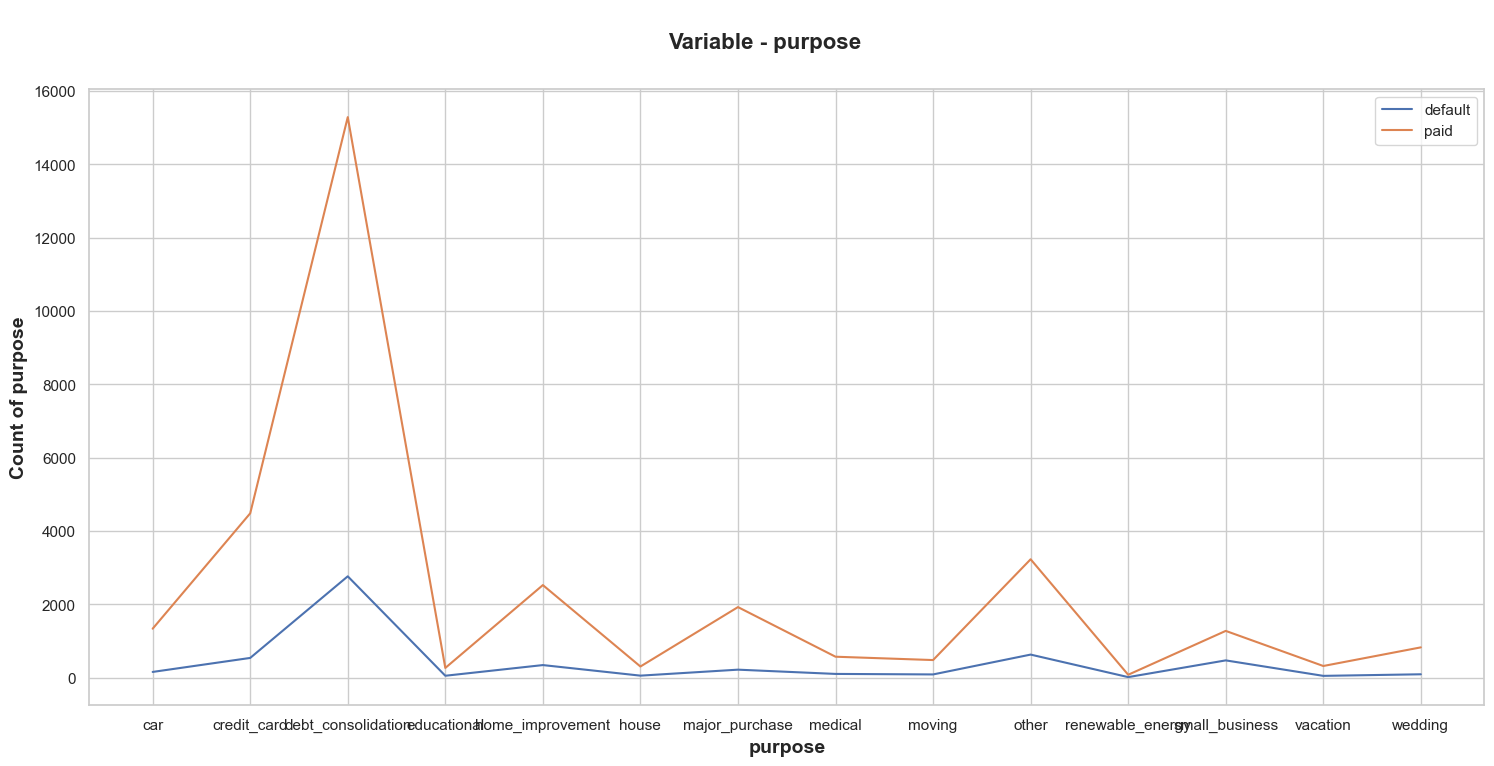

In [90]:
group_line('purpose')

---



##### addr_state
Desc: The state provided by the borrower in the loan application
<br><br>


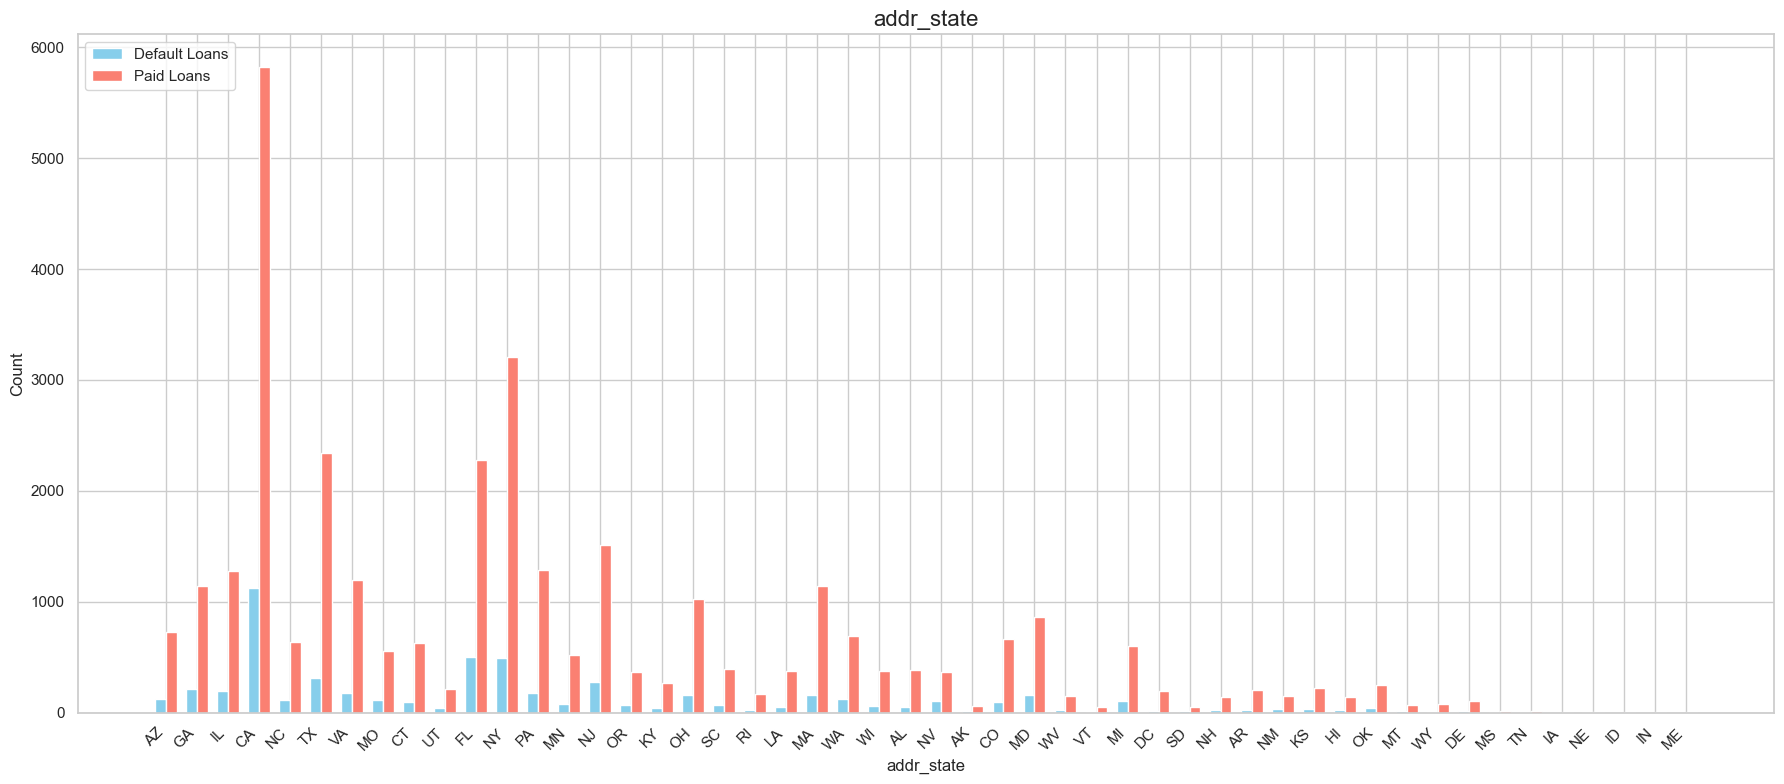

In [91]:
state_order = df['addr_state'].unique()
group_column_chart(state_order,df_default.addr_state, df_paid.addr_state, 'addr_state', 'addr_state')

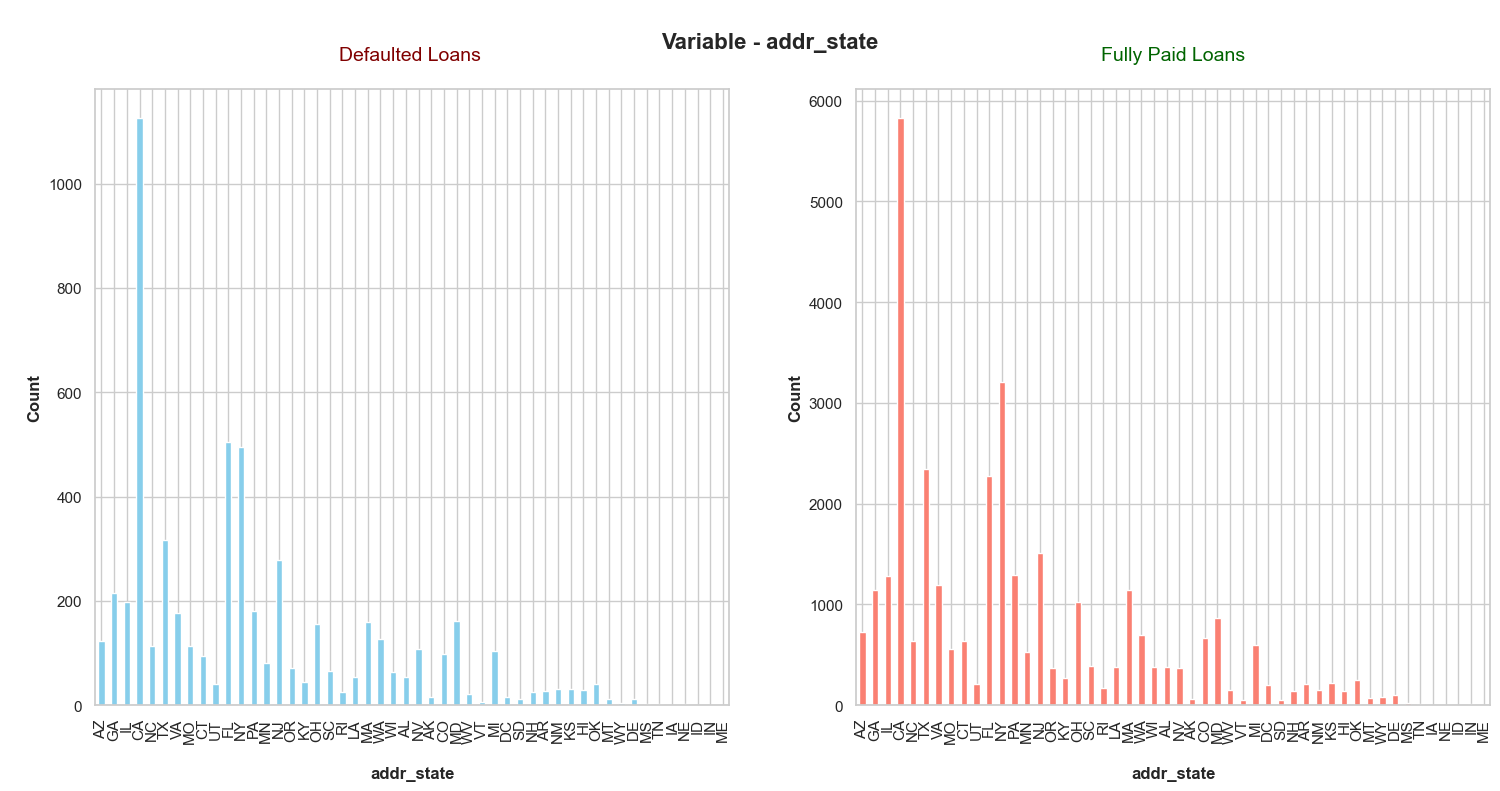

In [92]:
addr_order = df['addr_state'].unique()
bar_plot_ordered(addr_order,df_default.addr_state, df_paid.addr_state, 'addr_state', 'addr_state')

Observations: Looking into bar and grouped column charts, we dont see any patterns. Let's ignore this column. We will not look into Zipcode also, since there is nothing from the state address. If there is something eveident from state address, it makes sense to go into Zipcode.

---


<h4 style = "color : #4169E1">Driver variables identified</h4>

<table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Variable type</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>term</td>
      <td>Ordered Categorical</td>
    </tr>
    <tr>
      <td>int_rate</td>
      <td>Ordered Categorical</td>
    </tr>
    <tr>
      <td>grade</td>
      <td>Unordered Categorical</td>
    </tr>
    <tr>
      <td>sub_grade</td>
      <td>Unordered Categorical</td>
    </tr>
    <tr>
      <td>annual_inc</td>
      <td>Numerical</td>
    </tr>
    <tr>
      <td>verification_status</td>
      <td>Unordered Categorical</td>
    </tr>
    <tr>
      <td>purpose</td>
      <td>Unordered Categorical</td>
    </tr>
    <tr>
      <td>pub_rec</td>
      <td>Numerical</td>
    </tr>
    <tr>
      <td>revol_util</td>
      <td>Numerical</td>
    </tr>
    <tr>
      <td>pub_rec_bankruptcies</td>
      <td>Numerical</td>
    </tr>
  </tbody>
</table>


<h3 style = "color : #006400">Bivariate analysis </h3>


<h4 style = "color : #4169E1">Numerical vs. Numerical</h4>

Plotting all the selected Numeric variables in a pair plot, we dont see direct relationship between any of these numerical variables, therefore we will not drop any of these numerical  driver variables
<br><br>


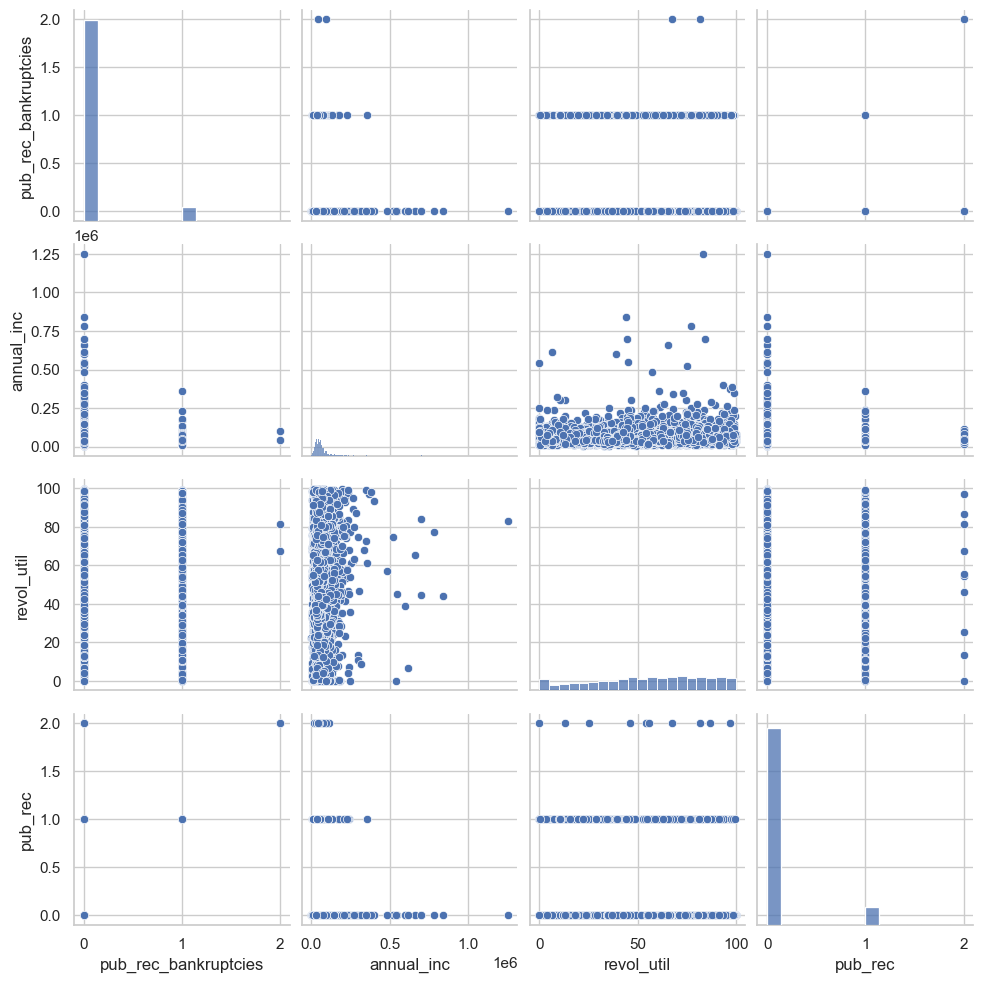

In [93]:
sns.pairplot(df_default[["pub_rec_bankruptcies","annual_inc","revol_util","pub_rec"]])
plt.show()


*Observation: We can see a **linear progression relationship between pub_rec and pub_rec_bankruptcies**. To confirm this further plotting them side by side, we could confirm that. Therefore we can ignore one column, pub_rec_bankruptcies from driver variables*


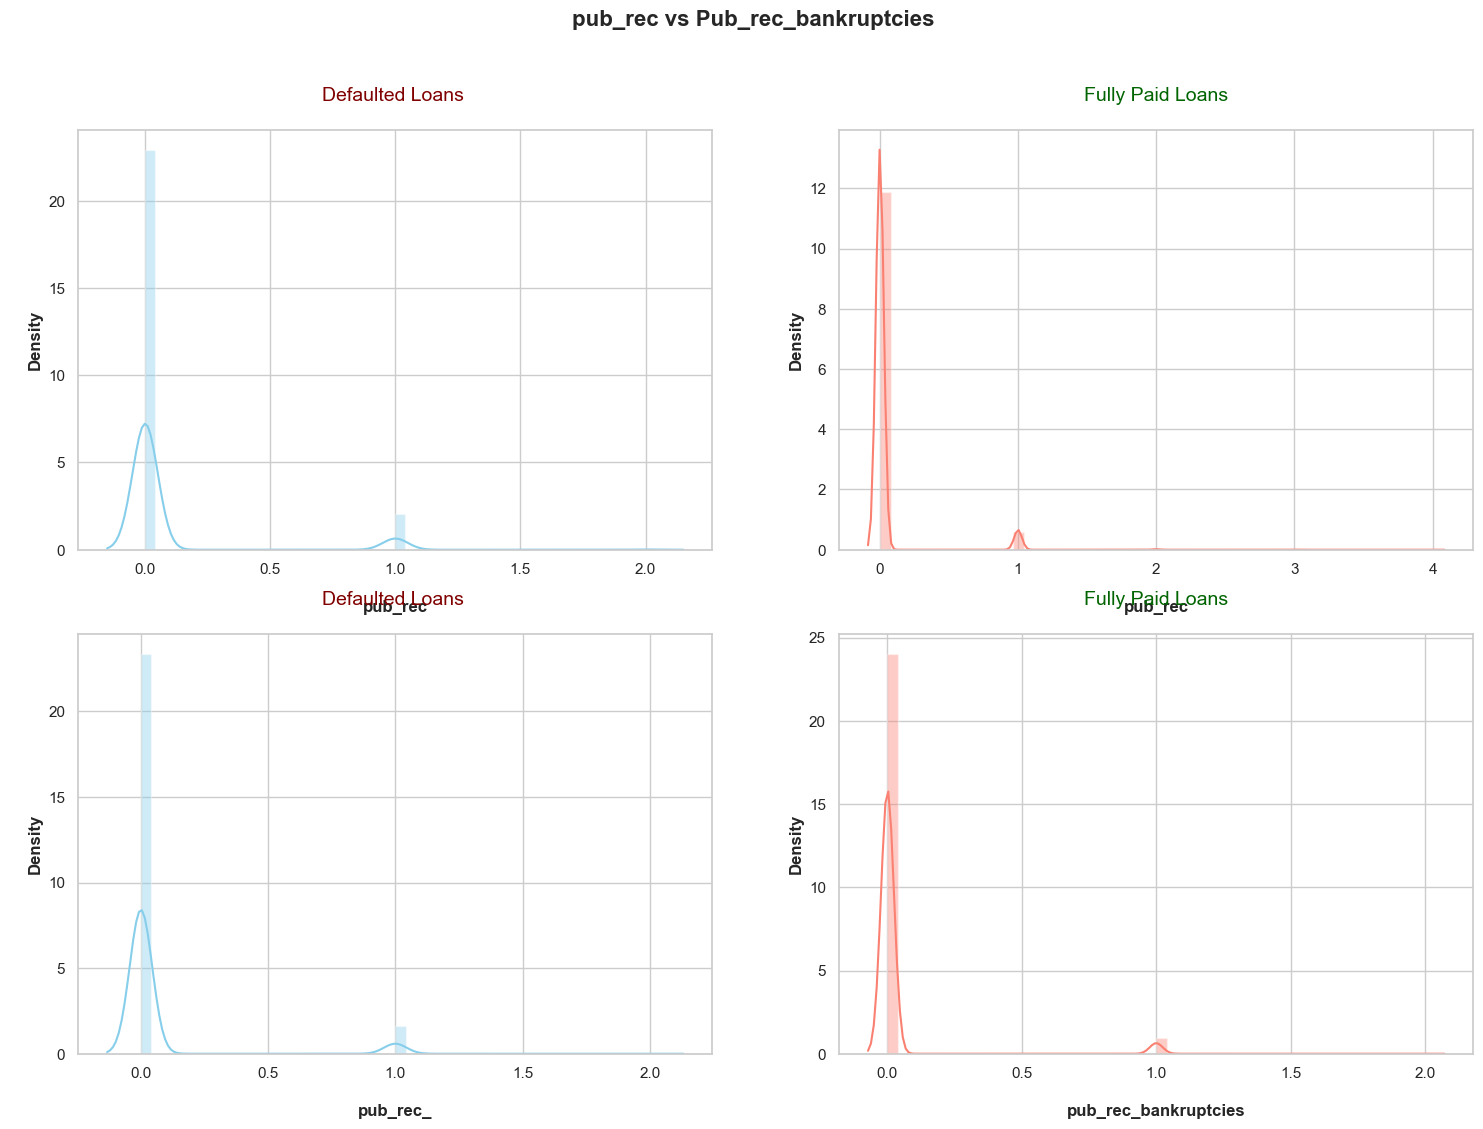

In [94]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.suptitle("pub_rec vs Pub_rec_bankruptcies", fontsize=16, fontweight='bold')


default_color='skyblue'
paid_color='salmon'



sns.distplot(df_default.pub_rec,  color=default_color, ax=axes[0,0])
sns.distplot(df_paid.pub_rec, color=paid_color, ax=axes[0,1])
sns.distplot(df_default.pub_rec_bankruptcies, color=default_color, ax=axes[1,0])
sns.distplot(df_paid.pub_rec_bankruptcies, color=paid_color, ax=axes[1,1])
y_label='Density'

       
axes[0,0].set_title('Defaulted Loans \n', fontsize=14, color='maroon')
axes[0,0].set_xlabel('\n' + "pub_rec", fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('\n' + y_label, fontsize=12, fontweight='bold')


axes[0,1].set_title('Fully Paid Loans\n', fontsize=14, color ='darkgreen')
axes[0,1].set_xlabel('\n' + "pub_rec", fontsize=12, fontweight='bold')
axes[0,1].set_ylabel('\n' + y_label, fontsize=12, fontweight='bold')

axes[1,0].set_title('Defaulted Loans \n', fontsize=14, color='maroon')
axes[1,0].set_xlabel('\n' + "pub_rec_", fontsize=12, fontweight='bold')
axes[1,0].set_ylabel('\n' + y_label, fontsize=12, fontweight='bold')


axes[1,1].set_title('Fully Paid Loans\n', fontsize=14, color ='darkgreen')
axes[1,1].set_xlabel('\n' + "pub_rec_bankruptcies", fontsize=12, fontweight='bold')
axes[1,1].set_ylabel('\n' + y_label, fontsize=12, fontweight='bold')



plt.show()

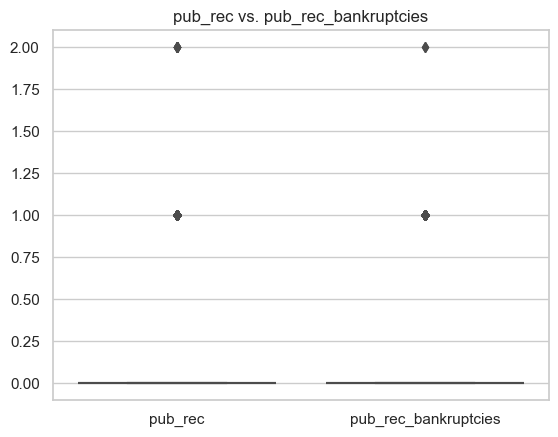

In [95]:
sns.boxplot(df_default[["pub_rec","pub_rec_bankruptcies",]])
plt.title('pub_rec vs. pub_rec_bankruptcies')
plt.show()

In [96]:
df_default.pub_rec[df_default.pub_rec_bankruptcies==1.0].value_counts()

pub_rec
1    366
Name: count, dtype: int64

<h4 style = "color : #4169E1">Categorical vs. Categorical</h4>

**grade vs sub_grade:**  
There seems to be a relationship between grade and sub-grade. Checking these values, looks like all sub_grades starts with Grade values. Therefore we can drop Grade column and use sub_grade only.

sub_grade    A1    A2     A3     A4     A5     B1     B2     B3     B4     B5  \
grade                                                                           
A          30.0  74.0  103.0  178.0  217.0    NaN    NaN    NaN    NaN    NaN   
B           NaN   NaN    NaN    NaN    NaN  171.0  228.0  341.0  329.0  356.0   
C           NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
D           NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
E           NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
F           NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
G           NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

sub_grade  ...    F1    F2    F3    F4    F5    G1    G2    G3    G4    G5  
grade      ...                                                              
A          ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
B          ...   NaN   NaN   NaN   NaN 

<Axes: xlabel='sub_grade', ylabel='grade'>

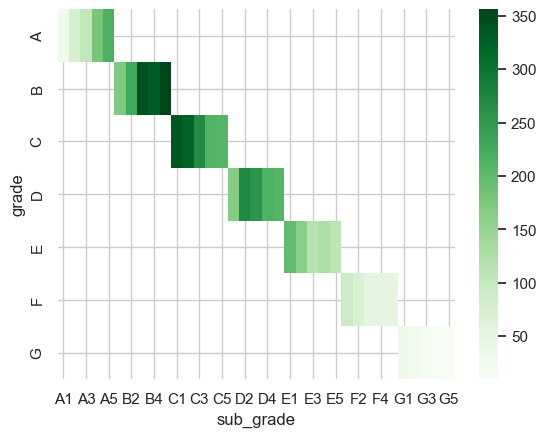

In [97]:
default_pivot=df_default.pivot_table(columns="sub_grade", index="grade", aggfunc='count', values='annual_inc')
print(default_pivot)
sns.heatmap(default_pivot, cmap="Greens")

**int_rate vs term:**  
Here there is no relation ship between int_rate and term, but as a combination they influence the target variable, **Loans of 36 months with interest 10-14% seems to be risky**

In [98]:
df_default['int_rate_bucket']=df_default['int_rate'].astype('int32')

In [99]:
# Reusable function for heat map

def heat_map(variable1, variable2):
    fig, ax = plt.subplots(figsize=(18, 8)) 
    pivot_table=df_default.pivot_table(columns=variable1, index=variable2, aggfunc='count', values='annual_inc')
    sns.heatmap(pivot_table, cmap="Greens",ax=ax)
    print(pivot_table)

In [100]:
df_default.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,int_rate_bucket
count,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5.627000e+03,5627,5627.000000,5627.000000,5627,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000
mean,12104.385108,11753.398792,10864.521324,13.820432,336.175006,6.242730e+04,2010-11-20 06:13:22.274746880,14.000624,0.170606,1997-06-04 06:39:43.792429312,1.058113,9.178070,0.084770,13514.243647,55.553707,21.427581,0.065754,13.260885
min,900.000000,900.000000,0.000000,5.420000,22.790000,4.080000e+03,2007-08-01 00:00:00,0.000000,0.000000,1962-09-01 00:00:00,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,5.000000
25%,5600.000000,5575.000000,5000.000000,11.310000,168.555000,3.700000e+04,2010-06-01 00:00:00,9.050000,0.000000,1994-04-01 00:00:00,0.000000,6.000000,0.000000,3968.000000,34.400000,13.000000,0.000000,11.000000
50%,10000.000000,10000.000000,9401.209477,13.610000,293.870000,5.300000e+04,2011-03-01 00:00:00,14.290000,0.000000,1998-09-01 00:00:00,1.000000,8.000000,0.000000,9211.000000,58.200000,20.000000,0.000000,13.000000
75%,16500.000000,16000.000000,15000.000000,16.400000,457.840000,7.500000e+04,2011-08-01 00:00:00,19.290000,0.000000,2001-10-16 12:00:00,2.000000,12.000000,0.000000,17518.000000,78.950000,28.000000,0.000000,16.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,1.250000e+06,2011-12-01 00:00:00,29.850000,8.000000,2008-09-01 00:00:00,8.000000,38.000000,2.000000,148829.000000,99.900000,74.000000,2.000000,24.000000
std,8085.732038,7760.516335,7661.750540,3.654413,217.051841,4.777601e+04,NaN,6.585577,0.534986,NaN,1.154136,4.525937,0.284873,15164.117475,27.867705,11.447427,0.249304,3.701131


int_rate_bucket    5      6      7      8      9      10     11     12     13  \
term                                                                            
 36 months       54.0  108.0  241.0  140.0  171.0  344.0  416.0  364.0  390.0   
 60 months        1.0   11.0   15.0   15.0   43.0  141.0  196.0  161.0  249.0   

int_rate_bucket     14     15     16     17     18     19     20    21    22  \
term                                                                           
 36 months       336.0  277.0  193.0   93.0   43.0   31.0   18.0   6.0   2.0   
 60 months       141.0  234.0  285.0  272.0  187.0  179.0  129.0  72.0  54.0   

int_rate_bucket    23   24  
term                        
 36 months        NaN  NaN  
 60 months       13.0  2.0  


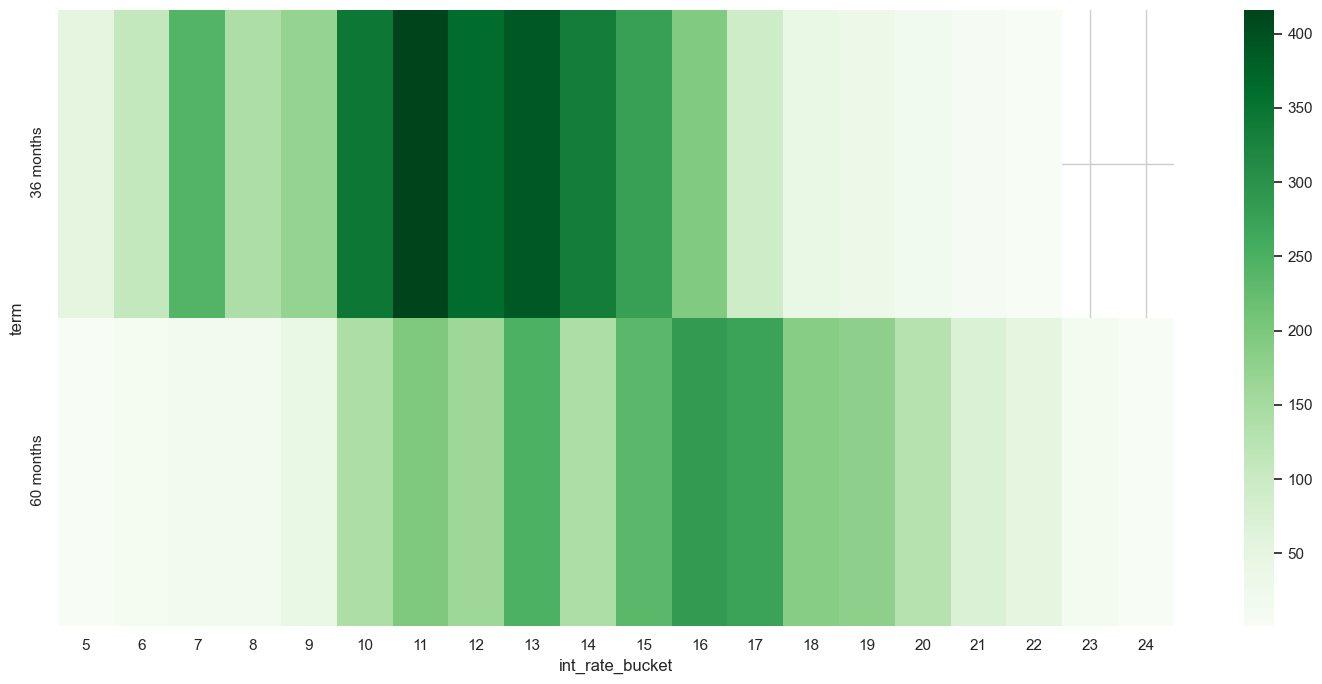

In [101]:
heat_map("int_rate_bucket", "term")

**grade vs term:**  
Here there is no relation ship between term and grade, but as a combination they influence the target variable, **Loans of 36 months with sub_Grade B3,B5  seems to be high risky**

sub_grade     A1    A2     A3     A4     A5     B1     B2     B3     B4  \
term                                                                      
 36 months  30.0  73.0  102.0  166.0  194.0  145.0  172.0  235.0  204.0   
 60 months   NaN   1.0    1.0   12.0   23.0   26.0   56.0  106.0  125.0   

sub_grade      B5  ...    F1    F2    F3    F4    F5    G1    G2    G3    G4  \
term               ...                                                         
 36 months  229.0  ...  17.0  14.0   8.0   6.0  11.0   3.0   5.0   4.0   3.0   
 60 months  127.0  ...  74.0  56.0  43.0  47.0  43.0  28.0  23.0  15.0  10.0   

sub_grade    G5  
term             
 36 months  6.0  
 60 months  4.0  

[2 rows x 35 columns]


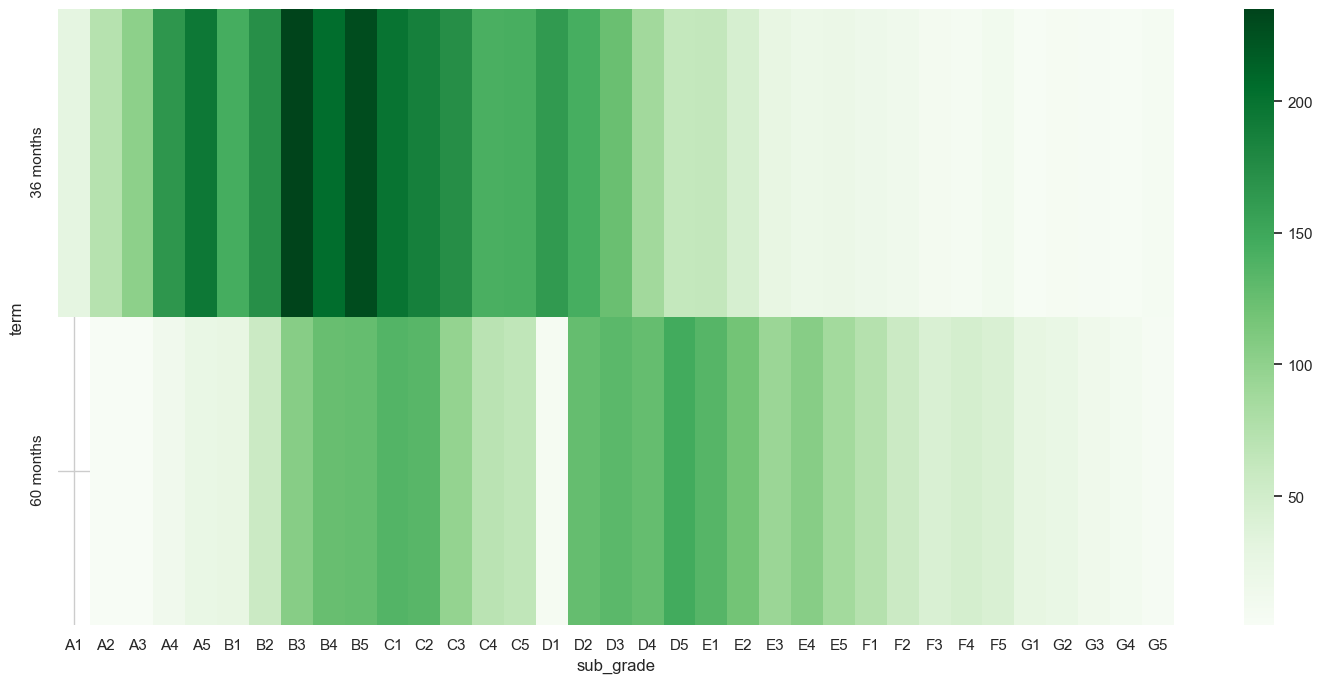

In [102]:
heat_map("sub_grade", "term")

**verification_status vs term:**  
Here there is no relation ship between verification_status and term, but as a combination they influence the target variable, **Loans of 36 months not verified is risky**

verification_status  Not Verified  Source Verified  Verified
term                                                        
 36 months                   1652              715       860
 60 months                    490              719      1191


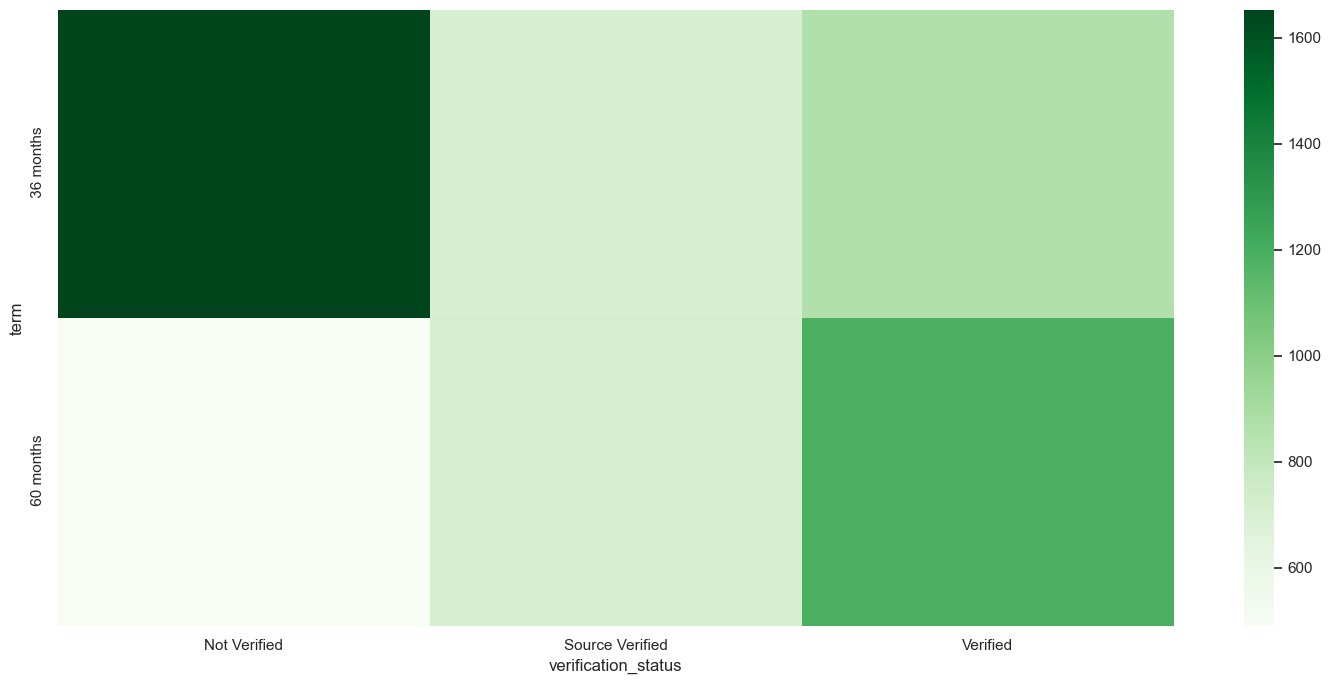

In [103]:
heat_map("verification_status", "term")

**purpose vs term**  
Here there is no relation ship between purpose and term, but as a combination they influence the target variable, **Debt Consolidation seems to be risky - firstly for 36 months and next for 60 months**

purpose     car  credit_card  debt_consolidation  educational  \
term                                                            
 36 months   82          318                1469           49   
 60 months   78          224                1298            7   

purpose     home_improvement  house  major_purchase  medical  moving  other  \
term                                                                          
 36 months               205     28             137       71      74    414   
 60 months               142     31              85       35      18    219   

purpose     renewable_energy  small_business  vacation  wedding  
term                                                             
 36 months                13             269        38       60  
 60 months                 6             206        15       36  


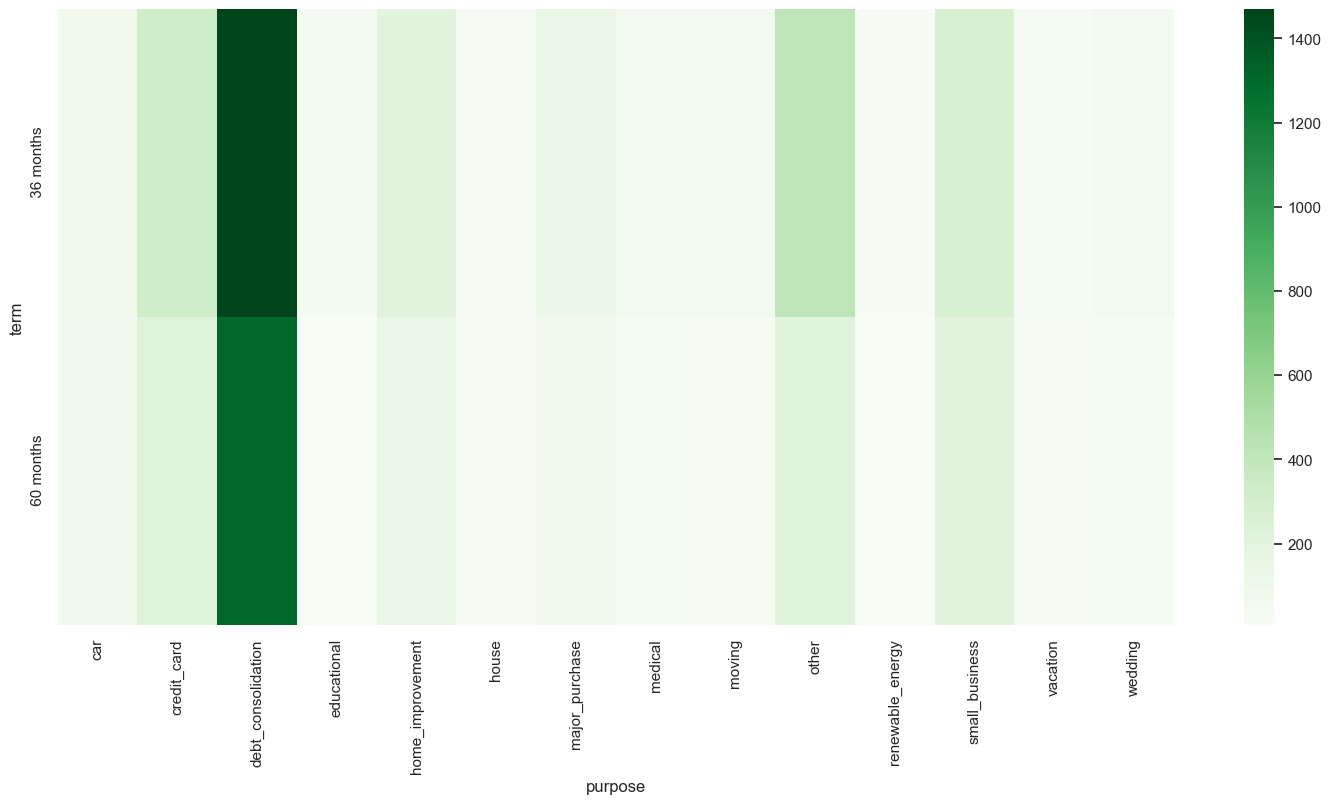

In [104]:
heat_map("purpose", "term")

<h2 style = "color : Brown">Driver variables</h2>

<table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Variable type</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>term</td>
      <td>Ordered Categorical</td>
    </tr>
    <tr>
      <td>int_rate</td>
      <td>Ordered Categorical</td>
    </tr>
    <tr>
      <td>sub_grade</td>
      <td>Unordered Categorical</td>
    </tr>
    <tr>
      <td>annual_inc</td>
      <td>Numerical</td>
    </tr>
    <tr>
      <td>verification_status</td>
      <td>Unordered Categorical</td>
    </tr>
    <tr>
      <td>purpose</td>
      <td>Unordered Categorical</td>
    </tr>
    <tr>
      <td>pub_rec</td>
      <td>Numerical</td>
    </tr>
    <tr>
      <td>revol_util</td>
      <td>Numerical</td>
    </tr>
  </tbody>
</table>
